# `Group Project` - Boston 2017 Bike Sharing Analysis (21.07.2021)

$\;\;\;\;\;\;$
## Introduction
In this project we will work with real world data from "Blue Bikes" which is a bike sharing firm based in Boston.

Our focus lies on data of the year 2017 and we will make a comprehensive analysis, in which we use typical data analysis and machine learning approaches to make use of the data to monitor and optimize the operations of "Blue Bikes". The overall topic is smart mobility systems and how we can use data in impactful ways to address pressing societal issues. In terms of bike sharing the addressed societal issue are the reduce of greenhouse gas emissions, reduce of pollution as health risk for urban population, reduce of (fatal) road accidents and to create a more efficient road transport infrastructur. We will cover the following task:

- **Task 1) Data Collection & Preparation**: 
    * Cleaning of datasets for use in later analysis stages
- **Task 2) Descriptive Analysis**: 
    * Demonstrate temporal demand patterns and seasonality
    * Demonstrate geographical demand patterns 
    * Define Key Performance Indicators which provides overview of current fleet operations
- **Task 3) Predictive Analysis**:
    * Forecast total system-level demand in the next hour

**The authors of this analysis are:**
* Lukas Tempfli    (7367097)
* Moritz Danhausen (7369413)
* Niklas Nesseler  (7367375)
* Robin Kirch      (7364580)
* Sven Dornbrach   (7364484)


Hints: 
1. Normal markdown (text) marks cells where we describe what we did and why we did certain things, while italic markdown (text) cells describes what knowledge we took away.
1. Please run the seperated cells from the top to the bottom

$\;\;\;\;\;\;$
# `Required Imports:`

In [1]:
import numpy as np
import pandas as pd
from datetime import date, time, datetime, timedelta 
import matplotlib.pyplot as plt
from datetime import datetime 
from datetime import timedelta 
import math
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
sns.set()
sns.set_style("white")
sns.set_palette("GnBu_d")
from folium import plugins
from folium.plugins import HeatMap as hm
import folium
from folium.features import DivIcon

$\;\;\;\;\;\;$
# `Task 1) Data Collection & Preparation:`

#### Task Description
We are using three datasets, which we are going to clean and adapt for later stages of this report. 

The dataset are:
- `Bike Sharing Rentals`: Contains data about all trips with blue bikes in 2017
- `Weather`: Contains hourly data about the weather in Boston from 2015 till 2020
- `Bike stations`: Contains data about all docking stations from "Blue Bike" [2021]

We are going to briefly describe how we proceeded and how we dealt with possible missing and erroneous data.

## Blue Bike Data - Collection & Preparation

We are reading the "boston_2017.csv" file into the juypter notebook, so that in the following we can work with the mentioned data set.

In [2]:
raw_data_boston = pd.read_csv("boston_2017.csv")
#Please download the "boston_2017.csv" file and place it in the same folder in which this juypter notebook is saved.

In the following cells we are calling the data set and use methods to get a first glimpse how the data set is structured and which values it contains.

*Here we see first instances of the "raw_data_boston" data frame and get a first basic overview how the data is structured*.

In [3]:
raw_data_boston

,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type
0,2017-01-01 00:06:58,2017-01-01 00:12:49,67,139,MIT at Mass Ave / Amherst St,Dana Park,644,Subscriber
1,2017-01-01 00:13:16,2017-01-01 00:28:07,36,10,Boston Public Library - 700 Boylston St.,B.U. Central - 725 Comm. Ave.,230,Subscriber
2,2017-01-01 00:16:17,2017-01-01 00:44:10,36,9,Boston Public Library - 700 Boylston St.,Agganis Arena - 925 Comm Ave.,980,Customer
3,2017-01-01 00:21:22,2017-01-01 00:33:50,46,19,Christian Science Plaza,Buswell St. at Park Dr.,1834,Subscriber
4,2017-01-01 00:30:06,2017-01-01 00:40:28,10,8,B.U. Central - 725 Comm. Ave.,Union Square - Brighton Ave. at Cambridge St.,230,Subscriber
...,...,...,...,...,...,...,...,...
1313769,2017-12-31 23:46:18,2017-12-31 23:50:27,117,141,Binney St / Sixth St,Kendall Street,1846,Subscriber
1313770,2017-12-29 16:11:56,2017-12-29 16:16:18,54,42,Tremont St at West St,Boylston St at Arlington St TEMPORARY WINTER L...,2,Subscriber
1313771,2017-12-30 08:09:44,2017-12-30 08:26:08,54,58,Tremont St at West St,Beacon St at Arlington St,1534,Subscriber
1313772,2017-12-30 12:20:01,2017-12-30 12:49:12,54,46,Tremont St at West St,Christian Science Plaza - Massachusetts Ave at...,1978,Subscriber


*As you can see below the "raw_data_boston" data frame does not contain null values, hence we don't need to thing how to handle those, in regard of deleting data tuples or data attributes or filling these with artifical values. It has over 1.3 million entries.*

*It contains following attributes:*
- *start_time(object)*
- *end_time(object)*
- *start_station_id (int64)*
- *end_station_id (int64)*
- *start_station_name (object)*
- *end_station_name (object)*
- *bike_id (int64)*
- *user_type (object)*

In [4]:
raw_data_boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1313774 entries, 0 to 1313773
Data columns (total 8 columns):
 #   Column              Non-Null Count    Dtype 
---  ------              --------------    ----- 
 0   start_time          1313774 non-null  object
 1   end_time            1313774 non-null  object
 2   start_station_id    1313774 non-null  int64 
 3   end_station_id      1313774 non-null  int64 
 4   start_station_name  1313774 non-null  object
 5   end_station_name    1313774 non-null  object
 6   bike_id             1313774 non-null  int64 
 7   user_type           1313774 non-null  object
dtypes: int64(3), object(5)
memory usage: 80.2+ MB


Now we save the raw data of "raw_data_boston" into a new data frame "trip_data", which will be modified to our needs. 

Firstly we add a column hour, which holds the respective hour of the day, so it contains a value between zero and 23. Furthermore we add the attribute duration, which contains how long the trip was, which will be used to check wheter there might be data tuples that have a not rational explainable length. Lastly we added the attribute "date_time", which will later be used to join the "trip_data" with the "weather_data". 

In [5]:
trip_data = raw_data_boston 
trip_data["start_time"] = pd.to_datetime(trip_data["start_time"], format="%Y/%m/%d %H:")
trip_data["end_time"]   = pd.to_datetime(trip_data["end_time"], format="%Y/%m/%d %H:")

trip_data["hour"]     = trip_data["start_time"].dt.hour
trip_data["year"]     = trip_data["start_time"].dt.year
trip_data["month"]    = trip_data["start_time"].dt.month
trip_data["day"]      = trip_data["start_time"].dt.day
trip_data["seconds"]  = trip_data["start_time"].dt.second
trip_data["duration"] = trip_data["end_time"] - trip_data["start_time"]

df1 = pd.DataFrame({'year':trip_data["year"],'month':trip_data["month"],
                 'day':trip_data["day"],'hour':trip_data["hour"] })
df1 = pd.to_datetime(df1, format="%Y/%m/%d, %H:")
trip_data["date_time"] = df1

trip_data.drop([("year"),("month"),("day"),("seconds")], axis = 1, inplace = True)

Below is a first glimpse of the effects our modifications did.

In [6]:
trip_data

,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type,hour,duration,date_time
0,2017-01-01 00:06:58,2017-01-01 00:12:49,67,139,MIT at Mass Ave / Amherst St,Dana Park,644,Subscriber,0,0 days 00:05:51,2017-01-01 00:00:00
1,2017-01-01 00:13:16,2017-01-01 00:28:07,36,10,Boston Public Library - 700 Boylston St.,B.U. Central - 725 Comm. Ave.,230,Subscriber,0,0 days 00:14:51,2017-01-01 00:00:00
2,2017-01-01 00:16:17,2017-01-01 00:44:10,36,9,Boston Public Library - 700 Boylston St.,Agganis Arena - 925 Comm Ave.,980,Customer,0,0 days 00:27:53,2017-01-01 00:00:00
3,2017-01-01 00:21:22,2017-01-01 00:33:50,46,19,Christian Science Plaza,Buswell St. at Park Dr.,1834,Subscriber,0,0 days 00:12:28,2017-01-01 00:00:00
4,2017-01-01 00:30:06,2017-01-01 00:40:28,10,8,B.U. Central - 725 Comm. Ave.,Union Square - Brighton Ave. at Cambridge St.,230,Subscriber,0,0 days 00:10:22,2017-01-01 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...
1313769,2017-12-31 23:46:18,2017-12-31 23:50:27,117,141,Binney St / Sixth St,Kendall Street,1846,Subscriber,23,0 days 00:04:09,2017-12-31 23:00:00
1313770,2017-12-29 16:11:56,2017-12-29 16:16:18,54,42,Tremont St at West St,Boylston St at Arlington St TEMPORARY WINTER L...,2,Subscriber,16,0 days 00:04:22,2017-12-29 16:00:00
1313771,2017-12-30 08:09:44,2017-12-30 08:26:08,54,58,Tremont St at West St,Beacon St at Arlington St,1534,Subscriber,8,0 days 00:16:24,2017-12-30 08:00:00
1313772,2017-12-30 12:20:01,2017-12-30 12:49:12,54,46,Tremont St at West St,Christian Science Plaza - Massachusetts Ave at...,1978,Subscriber,12,0 days 00:29:11,2017-12-30 12:00:00


Here we see that the trip_data contains our added attributes: hour (int64), duration (timedelta64) and date_time (datetime64)

In [7]:
trip_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1313774 entries, 0 to 1313773
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype          
---  ------              --------------    -----          
 0   start_time          1313774 non-null  datetime64[ns] 
 1   end_time            1313774 non-null  datetime64[ns] 
 2   start_station_id    1313774 non-null  int64          
 3   end_station_id      1313774 non-null  int64          
 4   start_station_name  1313774 non-null  object         
 5   end_station_name    1313774 non-null  object         
 6   bike_id             1313774 non-null  int64          
 7   user_type           1313774 non-null  object         
 8   hour                1313774 non-null  int64          
 9   duration            1313774 non-null  timedelta64[ns]
 10  date_time           1313774 non-null  datetime64[ns] 
dtypes: datetime64[ns](3), int64(4), object(3), timedelta64[ns](1)
memory usage: 110.3+ MB


We checked the trip_data for false entries in regard of trips that do not have a logical duration.

*As we can see on the "min" attribute we have false data tuples, as it is not possible to have a trip duration, which is negative. We will set a minimum duration of two minutes in the following to eliminate data tuples with a negative trip duration as well as to eliminate trips, which potentially were false starts or users trying to re-dock a bike to ensure it was secure.* 

*Also the "max" indicates false data tuples, as probably no ones rents a bike for a duration of over 48 days. Therefore we set the maximum duration of a trip to eight hours.*

In [8]:
trip_data["duration"].describe()

count                      1313774
mean     0 days 00:18:57.437388774
std      0 days 03:43:04.336374452
min              -1 days +23:06:07
25%                0 days 00:06:34
50%                0 days 00:10:56
75%                0 days 00:17:55
max               48 days 08:40:21
Name: duration, dtype: object

The mentioned deletion of data tuples, which are lower than two minutes in duration or higher than eight hours in duration, happens in the next cell.

*As you can see we filtered some data tuples, in fact we deleted 11.402 from the trip_data as they probably containted false information.*

In [9]:
#Limited duration to prevent using incorrect data

trip_data = trip_data[(trip_data["duration"]>"P0DT0H2M0S")&
                           (trip_data["duration"]<"P0DT8H0M0S")]

trip_data["duration"].describe()

count                      1302372
mean     0 days 00:15:17.483793416
std      0 days 00:19:58.729193062
min                0 days 00:02:01
25%                0 days 00:06:39
50%                0 days 00:10:59
75%                0 days 00:17:56
max                0 days 07:59:56
Name: duration, dtype: object

We wanted to ensure that all data tuples are representing a trip, which started in the year 2017.

*As we can see this is the case.*

In [10]:
trip_data["start_time"].describe()

<ipython-input-10-5bbd172550eb>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  trip_data["start_time"].describe()


count                 1302372
unique                1235326
top       2017-08-04 08:54:42
freq                        6
first     2017-01-01 00:06:58
last      2017-12-31 23:46:18
Name: start_time, dtype: object

We wanted to ensure that all data tuples are representing a trip, which ended in the year 2017.

*As we can see this is the case.*

In [11]:
trip_data["end_time"].describe()

<ipython-input-11-542d1368c8af>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  trip_data["end_time"].describe()


count                 1302372
unique                1234610
top       2017-06-27 17:27:42
freq                        6
first     2017-01-01 00:12:49
last      2017-12-31 23:50:27
Name: end_time, dtype: object

We use this method to find with how many docking stations "Blue Bikes" were operating in the year 2017.

*In the year 2017 "Blue Bikes" was operating with 285 docking stations.*

In [12]:
trip_data["start_station_name"].describe()

count                          1302372
unique                             285
top       MIT at Mass Ave / Amherst St
freq                             42141
Name: start_station_name, dtype: object

We use this method to find with how many bikes "Blue Bikes" were operating in the year 2017.

*In the year 2017 "Blue Bikes" was operating with 1799 bikes.*

In [13]:
a = trip_data["bike_id"]
a = a.unique()
a.size

1799

Here we are checking if any duplicates occur in "trip_data".

*As the number of instances did not change after calling the method proves that we do not have any duplicates in "trip_data".*

In [14]:
#trip_data = trip_data.drop_duplicates(subset=None, keep='first', inplace=False, ignore_index=True)
trip_data = trip_data.drop_duplicates()
trip_data.count()

start_time            1302372
end_time              1302372
start_station_id      1302372
end_station_id        1302372
start_station_name    1302372
end_station_name      1302372
bike_id               1302372
user_type             1302372
hour                  1302372
duration              1302372
date_time             1302372
dtype: int64

The following gives an overlook of our modified "trip_data" with the elimination of false data tuples.

In [15]:
trip_data

,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type,hour,duration,date_time
0,2017-01-01 00:06:58,2017-01-01 00:12:49,67,139,MIT at Mass Ave / Amherst St,Dana Park,644,Subscriber,0,0 days 00:05:51,2017-01-01 00:00:00
1,2017-01-01 00:13:16,2017-01-01 00:28:07,36,10,Boston Public Library - 700 Boylston St.,B.U. Central - 725 Comm. Ave.,230,Subscriber,0,0 days 00:14:51,2017-01-01 00:00:00
2,2017-01-01 00:16:17,2017-01-01 00:44:10,36,9,Boston Public Library - 700 Boylston St.,Agganis Arena - 925 Comm Ave.,980,Customer,0,0 days 00:27:53,2017-01-01 00:00:00
3,2017-01-01 00:21:22,2017-01-01 00:33:50,46,19,Christian Science Plaza,Buswell St. at Park Dr.,1834,Subscriber,0,0 days 00:12:28,2017-01-01 00:00:00
4,2017-01-01 00:30:06,2017-01-01 00:40:28,10,8,B.U. Central - 725 Comm. Ave.,Union Square - Brighton Ave. at Cambridge St.,230,Subscriber,0,0 days 00:10:22,2017-01-01 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...
1313769,2017-12-31 23:46:18,2017-12-31 23:50:27,117,141,Binney St / Sixth St,Kendall Street,1846,Subscriber,23,0 days 00:04:09,2017-12-31 23:00:00
1313770,2017-12-29 16:11:56,2017-12-29 16:16:18,54,42,Tremont St at West St,Boylston St at Arlington St TEMPORARY WINTER L...,2,Subscriber,16,0 days 00:04:22,2017-12-29 16:00:00
1313771,2017-12-30 08:09:44,2017-12-30 08:26:08,54,58,Tremont St at West St,Beacon St at Arlington St,1534,Subscriber,8,0 days 00:16:24,2017-12-30 08:00:00
1313772,2017-12-30 12:20:01,2017-12-30 12:49:12,54,46,Tremont St at West St,Christian Science Plaza - Massachusetts Ave at...,1978,Subscriber,12,0 days 00:29:11,2017-12-30 12:00:00


## Weather Data - Collection & Preparation

Here we are reading the "weather_hourly_boston.csv" file into the juypter notebook, so that in the following we can work with the mentioned data set.

In [16]:
raw_weather_data = pd.read_csv("weather_hourly_boston.csv")
#Please download the "weather_hourly_boston.csv" file and place it in the same folder in which this juypter notebook is saved.

In the following cells we are calling the data set and use methods to get a first glimpse how the data set is structured and which values it contains.

*Here we see first instances of the "raw_weather_data" data frame and get a first basic overview how the data is structured.*

In [17]:
raw_weather_data

,date_time,max_temp,min_temp,precip
0,2015-01-02 01:00:00,-1.1,-1.1,0.0
1,2015-01-02 02:00:00,-1.1,-1.1,0.0
2,2015-01-02 03:00:00,-0.6,-0.6,0.0
3,2015-01-02 04:00:00,-0.6,-0.6,0.0
4,2015-01-02 05:00:00,-0.6,-0.6,0.0
...,...,...,...,...
43843,2020-01-01 20:00:00,5.0,5.0,0.0
43844,2020-01-01 21:00:00,4.4,4.4,0.0
43845,2020-01-01 22:00:00,4.4,4.4,0.0
43846,2020-01-01 23:00:00,3.9,3.9,0.0


*As you can see below the "raw_weather_data" data frame does not contain null values, hence we don't need to thing how to handle those, in regard of deleting data tuples or data attributes or filling these with artifical values. It has over 43.354 entries.*

*It contains following attributes:*
- *date_time (datetime64)*
- *max_temp (float64)*
- *min_temp (float64)*
- *precip (float64)*

In [18]:
raw_weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43848 entries, 0 to 43847
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date_time  43354 non-null  object 
 1   max_temp   43354 non-null  float64
 2   min_temp   43354 non-null  float64
 3   precip     43356 non-null  float64
dtypes: float64(3), object(1)
memory usage: 1.3+ MB


We wanted to get an overview of all weather extremas from 2015 till 2020.

*We can see that the minimum temperature in this period is -22.8 degrees celsius. Moreover we see that the maximum temperature in this period is 36.1 degrees celsius.*

In [19]:
raw_weather_data.describe()

,max_temp,min_temp,precip
count,43354.000000,43354.000000,43356.000000
mean,11.456717,11.395922,0.095581
std,10.118606,10.114095,0.294019
min,-22.800000,-22.800000,0.000000
25%,3.300000,3.300000,0.000000
50%,11.700000,11.700000,0.000000
75%,20.000000,19.850000,0.000000
max,36.100000,36.100000,1.000000


In the following we are filtering the weather data to instances of the year 2017.

In [20]:
first_date = datetime(year=2017,day=1,month=1)
last_date  = datetime(year=2017,day=31,month=12)

helper = raw_weather_data
helper["date_time"] = pd.to_datetime(helper["date_time"])

weather_data = helper[(helper["date_time"]>=first_date)&(helper["date_time"]<=last_date)]
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8667 entries, 17520 to 26279
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date_time  8667 non-null   datetime64[ns]
 1   max_temp   8667 non-null   float64       
 2   min_temp   8667 non-null   float64       
 3   precip     8667 non-null   float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 338.6 KB


We are checking the wheater data for duplicates.

*As we can see the number of data tuples decreases from 8.667 to 8.535, so there were 132 duplicates in the data frame. In addition to that there are actually entries missing. Mathematically there should be 8.760 entries, if we would have a full dataset for every hour in the year 2017. That means we are missing 225 hours. In the following we are ignored trips with the missing hours, as we still have 97.4% of the data. We thought to fill the missing wheater hours with the same values as the day before, but opted to not do so as 97.4% still marks a representative value.*

In [21]:
weather_data = weather_data.drop_duplicates()
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8535 entries, 17520 to 26279
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date_time  8535 non-null   datetime64[ns]
 1   max_temp   8535 non-null   float64       
 2   min_temp   8535 non-null   float64       
 3   precip     8535 non-null   float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 333.4 KB


*We can see that the minimum temperature in the year 2017 for the city Boston is -16.7 degrees celsius and the mmaximum temperature is 35.0 degrees celsius. As we thought that this could be true, because of the such high intervall we checked with the national climate website for boston. Click [here](https://www.currentresults.com/Yearly-Weather/USA/MA/Boston/extreme-annual-boston-low-temperature.php) for minimum temperature and check [here](https://www.currentresults.com/Yearly-Weather/USA/MA/Boston/extreme-annual-boston-high-temperature.php) for the highest temperature. They have similar values, so we expect the data set to contain the right data.*

In [22]:
weather_data.describe()

,max_temp,min_temp,precip
count,8535.000000,8535.000000,8535.000000
mean,11.441640,11.382835,0.097832
std,9.893197,9.889018,0.297105
min,-16.700000,-16.700000,0.000000
25%,3.900000,3.900000,0.000000
50%,11.700000,11.700000,0.000000
75%,19.400000,19.400000,0.000000
max,35.000000,35.000000,1.000000


## Station Location - Collection & Preparation

Here we are reading the "current_bluebikes_stations.csv" file into the juypter notebook, so that in the following we can work with the mentioned data set.

In [23]:
raw_station_location_data = pd.read_csv("current_bluebikes_stations.csv")
#Please download the "current_bluebikes_stations.csv" file and place it in the same folder in which this juypter notebook is saved.

*As we can see we need to modify the data set as the describing attribute columns are one entry two low.*

In [24]:
raw_station_location_data

,Last Updated,June 11th 2021,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,Number,Name,Latitude,Longitude,District,Public,Total docks
1,W32006,160 Arsenal,42.36466403,-71.17569387,Watertown,Yes,11
2,A32019,175 N Harvard St,42.363796,-71.129164,Boston,Yes,18
3,S32035,191 Beacon St,42.38032335,-71.10878613,Somerville,Yes,19
4,C32094,2 Hummingbird Lane at Olmsted Green,42.28887,-71.095003,Boston,Yes,17
...,...,...,...,...,...,...,...
374,N32006,West Newton Armory,42.34947178,-71.22000679,Newton,Yes,11
375,A32043,Western Ave at Richardson St,42.36178741,-71.14393111,Boston,Yes,19
376,B32059,Whittier St Health Center,42.33286288,-71.09218862,Boston,Yes,19
377,D32040,Williams St at Washington St,42.306539,-71.107669,Boston,Yes,19


The mentioned required changes are made here.

In [25]:
station_location = raw_station_location_data
station_location.drop(0,inplace=True)
station_location.rename(columns={'Last Updated':'Number','June 11th 2021':'Name','Unnamed: 2':'Latitude','Unnamed: 3':'Longitude','Unnamed: 4':'District',
                                 'Unnamed: 5':'Public','Unnamed: 6':'Total Docks'}, inplace = True)

*The data cleanage works as we can see ten plausible entries.*

In [26]:
station_location.head(10)

,Number,Name,Latitude,Longitude,District,Public,Total Docks
1,W32006,160 Arsenal,42.36466403,-71.17569387,Watertown,Yes,11
2,A32019,175 N Harvard St,42.363796,-71.129164,Boston,Yes,18
3,S32035,191 Beacon St,42.38032335,-71.10878613,Somerville,Yes,19
4,C32094,2 Hummingbird Lane at Olmsted Green,42.28887,-71.095003,Boston,Yes,17
5,S32023,30 Dane St,42.38100143,-71.10402523,Somerville,Yes,15
6,M32026,359 Broadway - Broadway at Fayette Street,42.370803,-71.104412,Cambridge,Yes,23
7,C32091,645 Summer St,42.34178089,-71.03987017,Boston,Yes,19
8,M32054,699 Mt Auburn St,42.37500235,-71.14871614,Cambridge,Yes,25
9,V32001,7 Acre Park,42.41143223,-71.06823265,Everett,Yes,15
10,B32060,700 Commonwealth Ave.,42.34960945,-71.10391524,Boston,Yes,16


Here we are checking for null values.

*Null values occur for the attribut "District". We do not need to cancel those, because this attribut will not be used in the following.*

In [27]:
station_location.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 378 entries, 1 to 378
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Number       378 non-null    object
 1   Name         378 non-null    object
 2   Latitude     378 non-null    object
 3   Longitude    378 non-null    object
 4   District     375 non-null    object
 5   Public       378 non-null    object
 6   Total Docks  378 non-null    object
dtypes: object(7)
memory usage: 23.6+ KB


## Copy of trip data

In [28]:
def get_date (ts):
    return ts.date()

def get_weekday (ts):
    return ts.weekday()

def get_hour (ts):
    return ts.hour

def set1 (ts):
    return 1

In [29]:
trip_data["Date"]   = trip_data["start_time"].apply(lambda ts: get_date (ts))
trip_data["Rented"] = trip_data["Date"].apply(lambda ts: set1(ts))
trip_data.head(50)

trip_data_copy = trip_data

## Demand in dependency of the temperature

In [30]:
#connecting both data sets by  the date with an inner join

left  = trip_data
right = weather_data


inner_merge = pd.merge(left=left, right=right, left_on="date_time", right_on="date_time")

inner_merge

,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type,hour,duration,date_time,Date,Rented,max_temp,min_temp,precip
0,2017-01-01 00:06:58,2017-01-01 00:12:49,67,139,MIT at Mass Ave / Amherst St,Dana Park,644,Subscriber,0,0 days 00:05:51,2017-01-01,2017-01-01,1,3.9,3.9,0.0
1,2017-01-01 00:13:16,2017-01-01 00:28:07,36,10,Boston Public Library - 700 Boylston St.,B.U. Central - 725 Comm. Ave.,230,Subscriber,0,0 days 00:14:51,2017-01-01,2017-01-01,1,3.9,3.9,0.0
2,2017-01-01 00:16:17,2017-01-01 00:44:10,36,9,Boston Public Library - 700 Boylston St.,Agganis Arena - 925 Comm Ave.,980,Customer,0,0 days 00:27:53,2017-01-01,2017-01-01,1,3.9,3.9,0.0
3,2017-01-01 00:21:22,2017-01-01 00:33:50,46,19,Christian Science Plaza,Buswell St. at Park Dr.,1834,Subscriber,0,0 days 00:12:28,2017-01-01,2017-01-01,1,3.9,3.9,0.0
4,2017-01-01 00:30:06,2017-01-01 00:40:28,10,8,B.U. Central - 725 Comm. Ave.,Union Square - Brighton Ave. at Cambridge St.,230,Subscriber,0,0 days 00:10:22,2017-01-01,2017-01-01,1,3.9,3.9,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1271762,2017-12-31 00:16:21,2017-12-31 00:40:04,66,91,Allston Green District - Griggs St at Commonwe...,One Kendall Square at Hampshire St / Portland St,325,Subscriber,0,0 days 00:23:43,2017-12-31,2017-12-31,1,-7.8,-7.8,0.0
1271763,2017-12-31 00:28:08,2017-12-31 00:33:06,12,27,Ruggles T Stop - Columbus Ave at Melnea Cass Blvd,Roxbury Crossing T Stop - Columbus Ave at Trem...,1709,Subscriber,0,0 days 00:04:58,2017-12-31,2017-12-31,1,-7.8,-7.8,0.0
1271764,2017-12-31 00:42:58,2017-12-31 00:52:44,76,179,Central Sq Post Office / Cambridge City Hall a...,MIT Vassar St,762,Subscriber,0,0 days 00:09:46,2017-12-31,2017-12-31,1,-7.8,-7.8,0.0
1271765,2017-12-31 00:54:06,2017-12-31 00:59:29,36,81,Copley Square - Dartmouth St at Boylston St,Boylston St at Washington St,1326,Subscriber,0,0 days 00:05:23,2017-12-31,2017-12-31,1,-7.8,-7.8,0.0


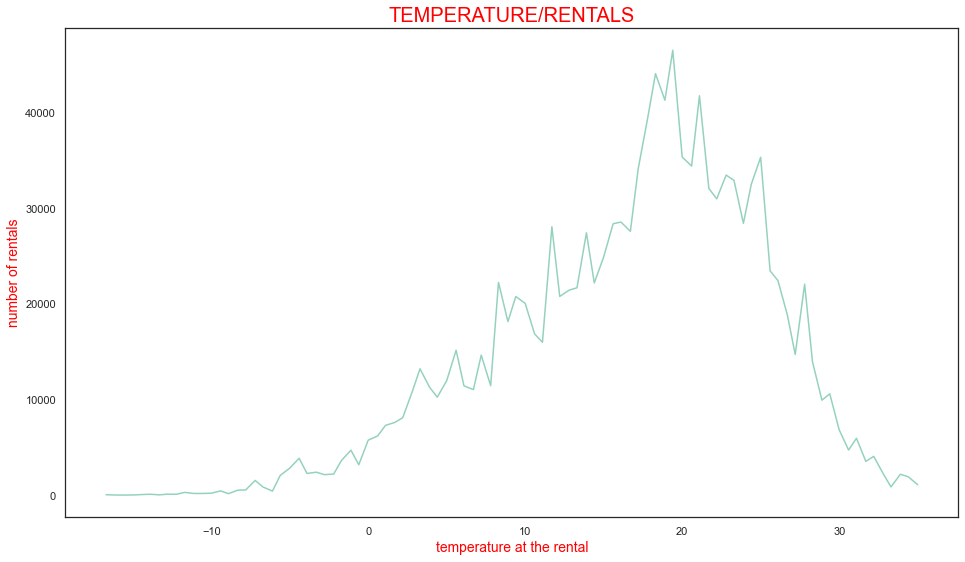

In [31]:

weather_rentals=inner_merge.groupby("min_temp")["Rented"].sum()

Fig_2, ax_2= plt.subplots(figsize=(16,9))

ax_2.plot(weather_rentals)

ax_2.set_title("TEMPERATURE/RENTALS", fontsize = 20, fontname = "arial", color = "red")
ax_2.set_ylabel("number of rentals", fontsize = 14, color = "red")
ax_2.set_xlabel("temperature at the rental", fontsize = 14, color = "red")

plt.show()





## add weekday to raw_data_boston

In [32]:
#add the weekday to the data

trip_data["Weekday"] = trip_data["start_time"].apply(lambda ts: get_weekday (ts))

## Popularity of the stations 

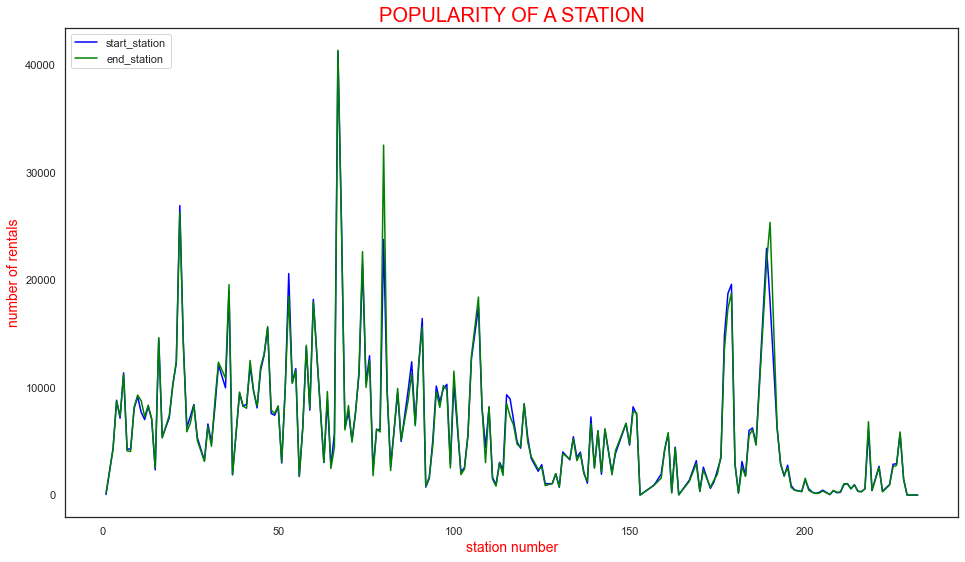

In [33]:
start_station_rentals = inner_merge.groupby("start_station_id")["Rented"].sum()
end_station_rentals    = inner_merge.groupby("end_station_id")["Rented"].sum()


Fig_4, ax_4= plt.subplots(figsize=(16,9))

ax_4.plot(start_station_rentals, label="start_station", color = "blue")
ax_4.plot(end_station_rentals , label="end_station", color = "green")

ax_4.set_title("POPULARITY OF A STATION", fontsize = 20, fontname = "arial", color = "red")
ax_4.set_ylabel("number of rentals", fontsize = 14, color = "red")
ax_4.set_xlabel("station number", fontsize = 14, color = "red")

plt.legend(loc="upper left")

In [34]:
ypos= trip_data["start_station_id"].unique()
#ypos1=len(ypos)
#ypos1
ypos

array([ 67,  36,  46,  10,  47, 107,  58,   9,  88,  89, 133,  27,  80,
        22,  39, 178,  42,   4, 115, 161, 102,  33,  84,  25, 131, 152,
        51,  21,  23,  32,  94,  49,  54, 146, 179,  30,  96, 190,   8,
        41, 110, 197,  93,  68, 145,  19, 105, 180,  87, 185, 119,  59,
        73, 118,  77, 215,  16,  81,  11, 213,  98,  14, 195, 163, 104,
        78, 176, 184,  76,  95,  43,  74,   6,  91, 169, 183, 100, 116,
       124,  70,   7,  75, 173, 151,  15,   5, 139, 218, 150,  31,  24,
        20,   3,  44, 130,  17,  56, 174, 142, 159,  71,  40, 177, 175,
       160, 189,  63, 108, 141, 149, 137, 109,  37, 117,  90,  57, 121,
       140, 208,  72, 143, 186,  85,  12, 217, 200, 126, 138, 170,  65,
        97, 210, 135, 201, 171,  92, 219,  29, 136, 205, 196, 153,   1,
       192, 202, 162, 214, 209, 216,  64,  48, 203, 129,  60,  13,  35,
        26, 120, 211, 128, 113, 125, 122, 111, 167,  99,  79, 112, 212,
       194,  66,  53, 199, 204,  45,  55,  52,  61, 134,  50, 18

In [35]:
max= trip_data["start_station_id"].quantile(1)
max=int(max)
stations= np.arange(1,233)
stations

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

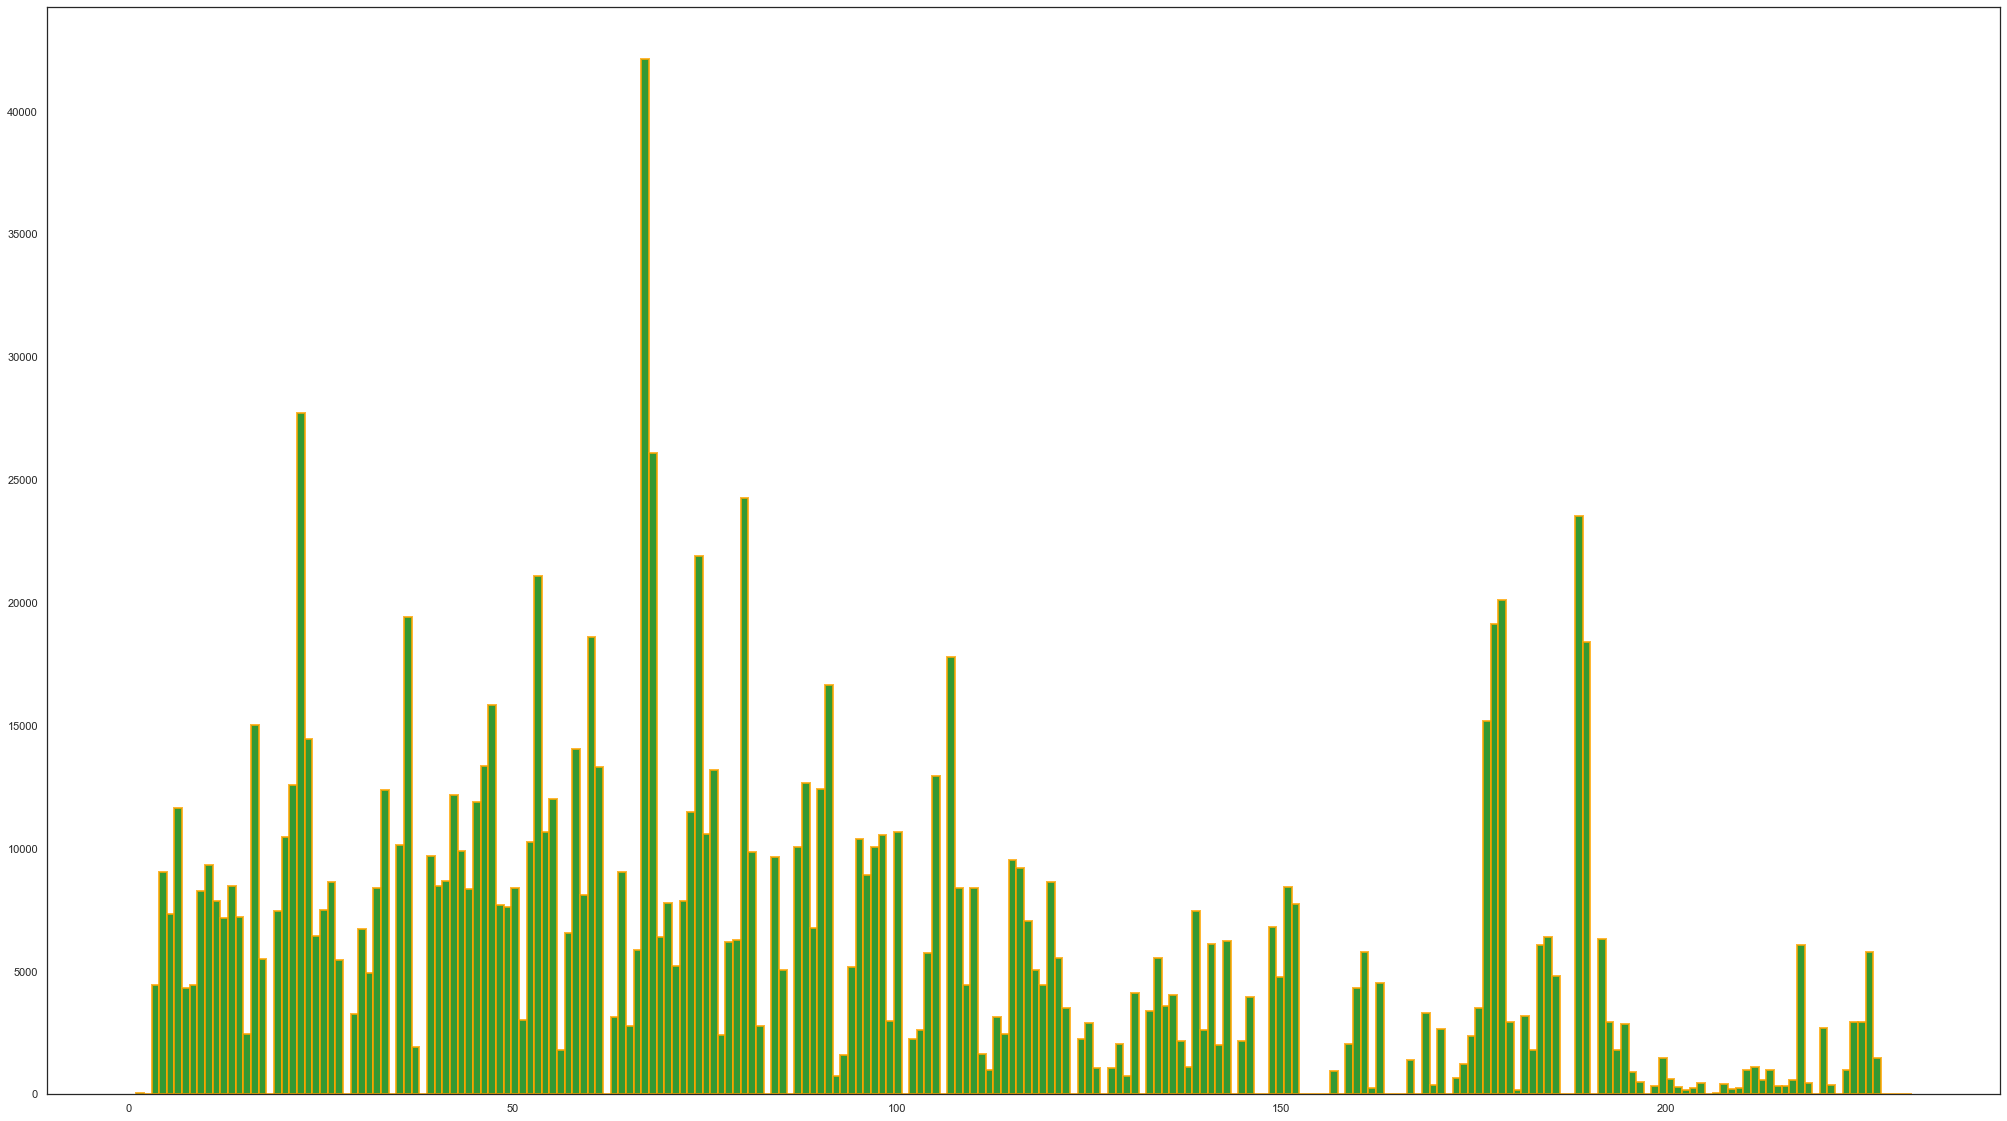

In [36]:
station_rentals=trip_data.groupby("start_station_id")["Rented"].sum()
#plt.bar(stations,station_rentals, width=0.5)
#plt.show
#station_rentals
#plt.hist(raw_data_boston.start_station_id,bins= stations)
plt.figure(figsize=(35,20)) #change your figure size as per your desire here
n,bins,patch = plt.hist(trip_data.start_station_id,bins=232, color='green', alpha=0.8, label='Value', edgecolor='orange', linewidth=2)

plt.show()

## Popularity of start stations

In [37]:
df_station_rentals = pd.DataFrame(station_rentals)
df_station_rentals = df_station_rentals.sort_values(["Rented"], ascending=False)

right = df_station_rentals
left  = trip_data


inner_merge2 = pd.merge(df_station_rentals,trip_data, on="start_station_id",how="left")
del inner_merge2["start_time"]
del inner_merge2["end_time"]
del inner_merge2["end_station_id"]
del inner_merge2["end_station_name"]
del inner_merge2["bike_id"]
del inner_merge2["user_type"]
del inner_merge2["date_time"]
del inner_merge2["Date"]
del inner_merge2["Rented_y"]
del inner_merge2["Weekday"]
del inner_merge2["hour"]
#pd.merge(left=left, right=right, how="left",left_on="start_station_id", right_on="start_station_id")
inner_merge2 = inner_merge2.drop_duplicates(subset=["start_station_id"], keep='first', inplace=False, ignore_index=False)
inner_merge2.set_index("start_station_id",inplace=True)
inner_merge2

,Rented_x,start_station_name,duration
start_station_id,,,
67,42141,MIT at Mass Ave / Amherst St,0 days 00:05:51
22,27746,South Station - 700 Atlantic Ave.,0 days 00:03:14
68,26091,Central Square at Mass Ave / Essex St,0 days 00:14:36
80,24260,MIT Stata Center at Vassar St / Main St,0 days 00:04:19
189,23519,Kendall T,0 days 00:05:47
...,...,...,...
164,23,Test 000e3,0 days 00:24:18
232,4,Four Corners - 157 Washington St,0 days 00:09:05
229,2,8D QC Station 01,0 days 00:14:42


## Demand in dependency of the weather

<function matplotlib.pyplot.show(close=None, block=None)>

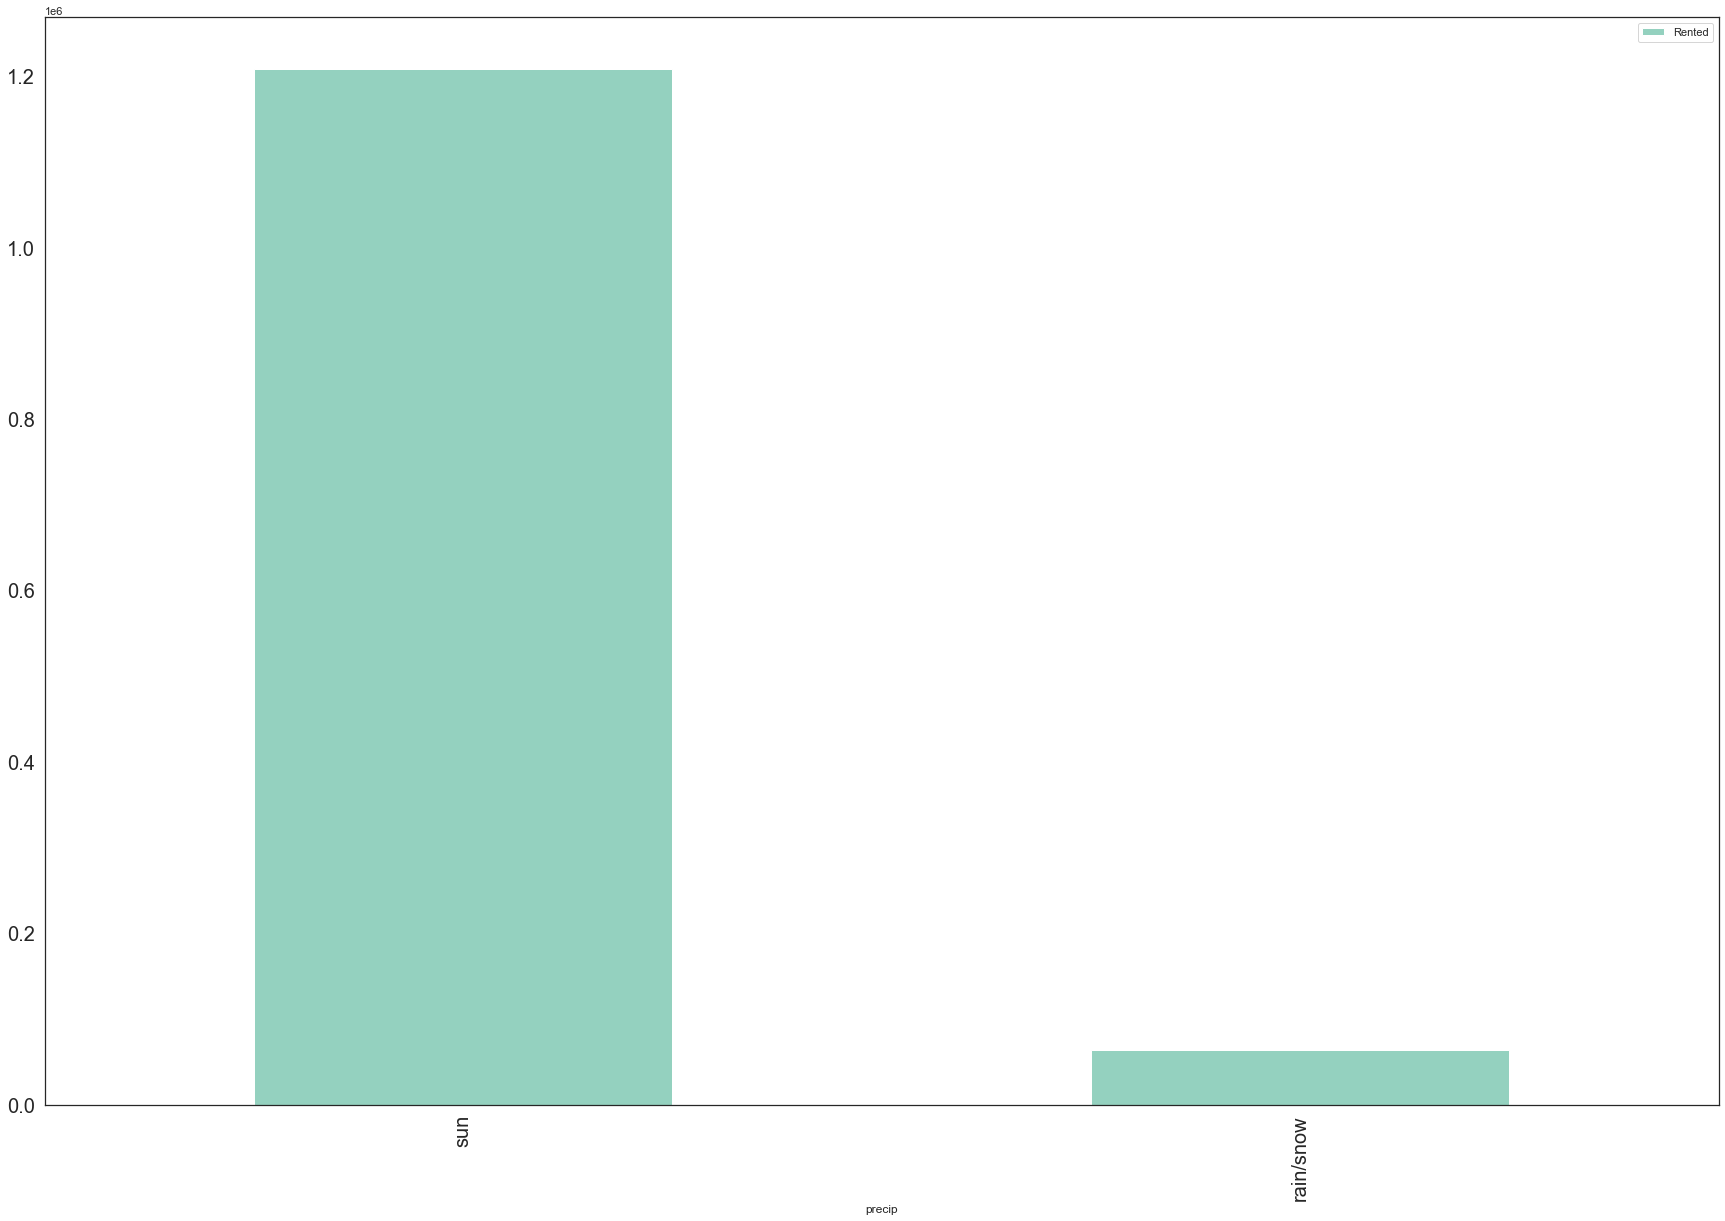

In [38]:
left  = trip_data
right = weather_data


inner_merge3 = pd.merge(left=left, right=right, left_on="date_time", right_on="date_time")

#inner_merge3

station_rentals=inner_merge3.groupby("precip")["Rented"].sum()
#plt.bar(stations,station_rentals, width=0.5)
#plt.show
#station_rentals
#plt.hist(inner_merge3.precip,bins= inner_merge3.Rented)
#plt.figure(figsize=(35,20)) #change your figure size as per your desire here
#n,bins,patch = plt.hist(inner_merge3.precip,bins=2, color='green', alpha=0.8, label='Value', edgecolor='orange', linewidth=2)



#dfX=pd.DataFrame({'precip':inner_merge3["precip"],'Rented':inner_merge3.groupby("precip")["Rented"].sum() })
#df.set_index('precip')[['Rented']].plot.bar()
df = pd.DataFrame(station_rentals, columns = ['precip','Rented'])
df.plot.bar(x = 'precip', y = 'Rented',figsize=(30,20),fontsize = 20)
bars = ['sun', 'rain/snow']
y_pos = np.arange(len(bars))

# Create names on the x-axis
plt.xticks(y_pos, bars)
plt.show



$\;\;\;\;\;\;$
# `Task 2) Descriptive Analysis:`

#### Task Description
1. `Temporal Demand Patterns and Seasonality:` We demonstrate how fleet usage varies during a day, a week and over the year. Furthermore we are going to explain observed patterns.
1. `Geographical Demand Patterns:` We are going to visualize which stations are particularly popular and which are not as well as a rationale why this might be the case.
1. `Key Performance Indicators (KPIs):` We define [add number here] KPIs that we would include in a dashboard for a fleet operators. In theory these KPIs provide an immediate overview of the current fleet operations and how well the fleet is doing in terms of utilization, revenue, coverage and/or other business-related aspects. Additonally we explain the rationale behind each KPI and explain why we chose them. We calculate hourly values for the selected KPIs for the year 2017 and visualize them over time. Furthermore we are going to explain observed patterns.

## Temporal Demand Patterns and Seasonality:

The following cell creates a visualization, which shows the amount of rentals per hour. We are summing the number on rentals over all 24 hours over the hole year.
- At the moment the total of all rented bikes per hour over the hole year is printed (-> needed to be /365 for one day)

<function matplotlib.pyplot.show(close=None, block=None)>

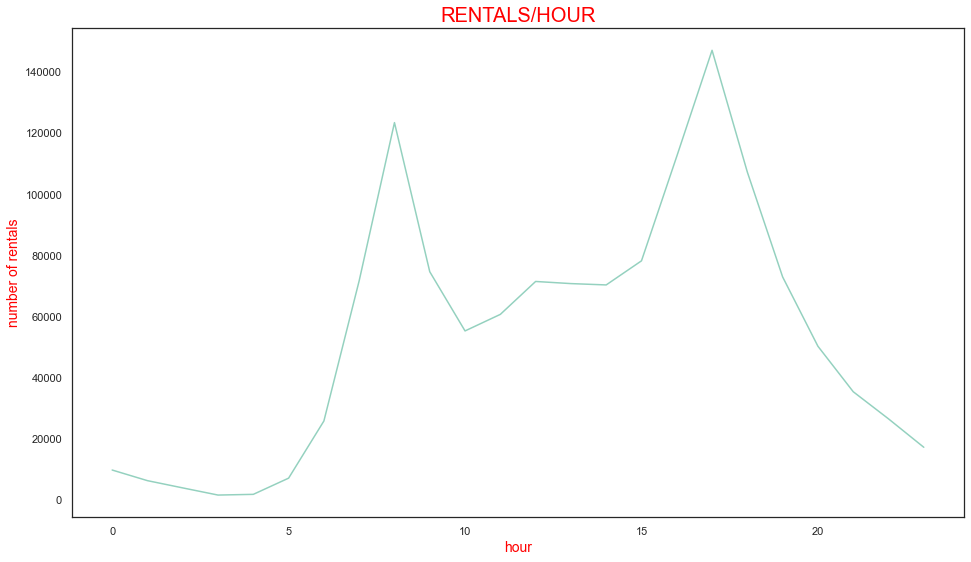

In [39]:
hourly_rentals = trip_data.groupby("hour")["Rented"].sum()
Fig_3, ax_3    = plt.subplots(figsize=(16,9))
ax_3.plot(hourly_rentals)
ax_3.set_title("RENTALS/HOUR", fontsize = 20, fontname = "arial", color = "red")
ax_3.set_ylabel("number of rentals", fontsize = 14, color = "red")
ax_3.set_xlabel("hour", fontsize = 14, color = "red")
plt.show

*As we look upon the graph we notice two extrema. One in the morning around 8 am and one in the evening around 5 pm. The number of rentals increases continously after 5 am till it reaches the first extrema at around 8 am. After that the number of rentals continoulsy decreases till 10am, after that it is more or less steadily climbing till the second extrema around 5 pm. Afterwards it is falling constantly till we reach 5 am again.*

*The rational explanation for the two extremas is that they are generated by locals, who are using the bikes to get to work and home from work. The more or less consistent number of rented bikes between 9 am till 15 am can be explained by tourism use, as well as free time activities by locals, which are likely most active in these hours. Otherwise the number would likely be much lower as many people are working in these hours. The small increase in this period can be explained by the fact that some working people might take a fast bike trip to grab lunch. Moreover the low number of rentals in the night hours can be explained that most people are active during the day and rest at night.*

##  Fleet  usage during the week

<function matplotlib.pyplot.show(close=None, block=None)>

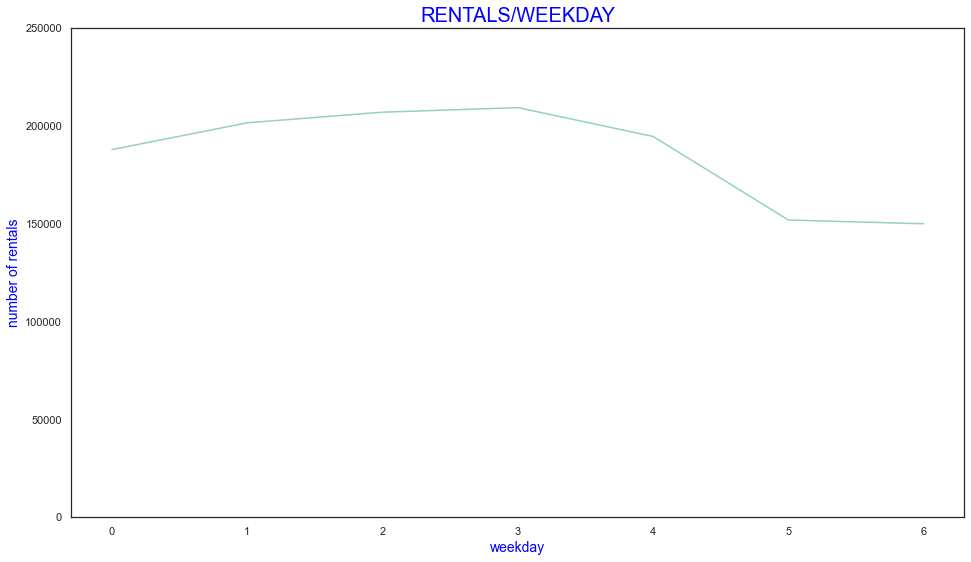

In [40]:
weekday_rentals = trip_data.groupby("Weekday")["Rented"].sum()
Fig_3, ax_3     = plt.subplots(figsize=(16,9))

ax_3.plot(weekday_rentals)

ax_3.set_title("RENTALS/WEEKDAY", fontsize = 20, fontname = "arial", color = "blue")
ax_3.set_ylabel("number of rentals", fontsize = 14, color = "blue")
ax_3.set_xlabel("weekday", fontsize = 14, color = "blue")

plt.ylim(0, 250000)

plt.show

In the Graph we can see high demand during the week and low demand at the weekend. Like in the Graph from above the demand is correlated to the working days which means that a bike is rented mostly for the way to work. Due to the fact most of the people do not work at the weekend there is low demand at those days. As a result the major group of people that rent a bikes live in Boston and are not tourists.

## Fleet usage during a year

In [41]:
bikes_rented_total = trip_data.groupby(["Date"], as_index=False)["Rented"].sum()
bikes_rented_total

x_brt = bikes_rented_total["Date"]
y_brt = bikes_rented_total["Rented"]

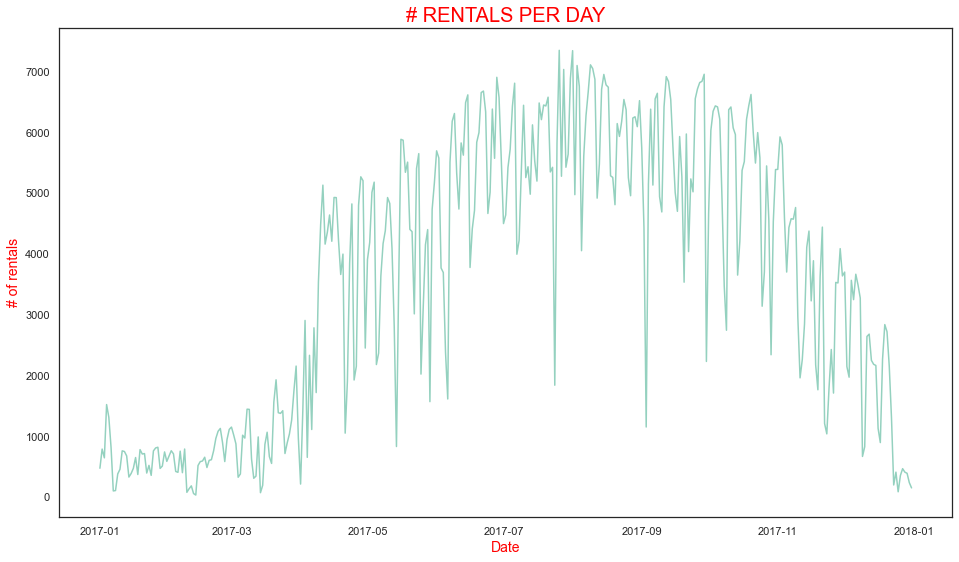

In [42]:
#bikes_rented_total = raw_data_boston.groupby("Date")["Rented"].sum()
fig,ax = plt.subplots(figsize=(16,9)) 

ax.plot(x_brt, y_brt)

ax.set_title("# RENTALS PER DAY", fontsize = 20, fontname = "arial", color = "red")
ax.set_ylabel("# of rentals", fontsize = 14, color = "red")
ax.set_xlabel("Date", fontsize = 14, color = "red")

plt.show()

In [43]:
weather_plot = weather_data

del weather_plot ["min_temp"]
#del weather_plot ["precip"]
weather_plot

,date_time,max_temp,precip
17520,2017-01-01 01:00:00,4.4,0.0
17521,2017-01-01 02:00:00,5.0,1.0
17522,2017-01-01 03:00:00,5.0,1.0
17523,2017-01-01 04:00:00,5.0,1.0
17524,2017-01-01 05:00:00,4.4,1.0
...,...,...,...
26274,2017-12-30 18:00:00,-8.9,1.0
26275,2017-12-30 20:00:00,-8.3,0.0
26276,2017-12-30 21:00:00,-8.3,1.0
26278,2017-12-30 22:00:00,-8.3,1.0


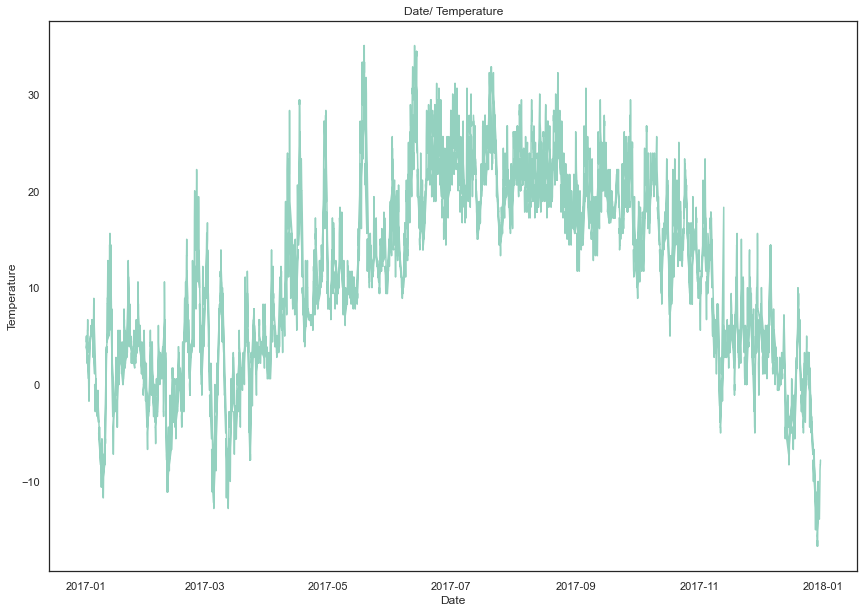

In [44]:
weather_plot
x = weather_plot['date_time']
y = weather_plot['max_temp']
Fig_1 = plt.figure(figsize=(22,15))
ax_1 = Fig_1.add_axes([0.5, 0.5, 0.51, 0.51])
ax_1.plot(x, y)
ax_1.set_xlabel('Date')
ax_1.set_ylabel('Temperature')
ax_1.set_title('Date/ Temperature')

plt.show()

As we can see there is much demand in the summer than in the winter. It can be explained with the weather. So there is no need to add the seasons as input feature for our prediction

### Frequency of temperature

In order to ensure the statements about the relationship between temperature and rental behavior, it makes sense to consider the frequency with which temperatures occur.

In [45]:
count_temperature = weather_data
count_temperature = count_temperature["max_temp"].value_counts().to_frame()
count_temperature.reset_index(level=0, inplace=True)
count_temperature.rename(columns={'max_temp':'count'}, inplace=True)
count_temperature.rename(columns={'index':'max_temp'}, inplace=True)
count_temperature

count_temperature.info()
count_temperature.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   max_temp  94 non-null     float64
 1   count     94 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 1.6 KB


,max_temp,count
count,94.000000,94.000000
mean,9.165957,90.797872
std,15.155137,64.213284
min,-16.700000,2.000000
25%,-3.750000,21.750000
50%,9.150000,94.000000
75%,22.075000,147.500000
max,35.000000,210.000000


Text(0.5, 0, 'Temperature(°C)')

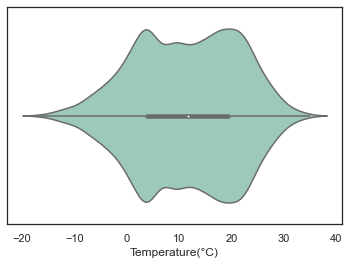

In [46]:
ax = sns.violinplot(x=weather_data["max_temp"])
plt.xlabel("Temperature(°C)")

In [47]:
def plot_regularized_polyregression (x, y, lam, d):
    
    min_x, max_x = x.min(), x.max()
    xs = 2*(x - min_x)/(max_x - min_x) - 1
    X = np.array([xs**i for i in range(d,-1,-1)]).T
    theta = np.linalg.solve(X.T @ X + lam*np.eye(X.shape[1]), X.T @ y)  # see lecture notes for derivation!, where np.eye() returns the identity matrix
    xt0 = np.linspace(min_x-1, max_x+1, 400)
    xt = 2*(xt0 - min_x)/(max_x - min_x) - 1
    Xt = np.array([xt**i for i in range(d,-1,-1)]).T
    yt = Xt @ theta
    
    # plotting routine
    plt.figure(figsize = (8,6))
    plt.scatter(x, y, marker="x")
    ylim = plt.ylim()
    plt.plot(xt0, yt, 'C1')
    plt.xlabel("Temperature (°C)")
    plt.ylabel("Demand (GW)")
    plt.xlim([min_x-2, max_x+2])
    plt.ylim(ylim)
    print(theta[:4])

[30.20422903  6.00142233 28.44938446 26.78014369]


Text(0, 0.5, 'Frequency')

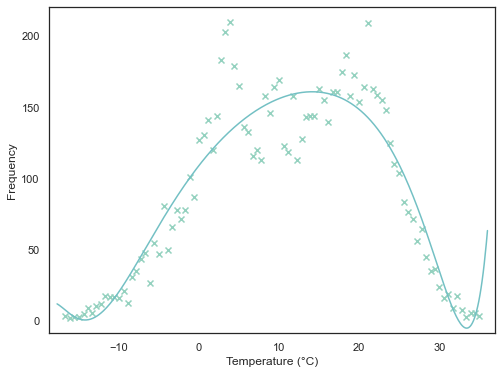

In [48]:
xp=count_temperature['max_temp']
yp=count_temperature['count']

plot_regularized_polyregression (xp,yp,0.1, 15)

plt.xlabel("Temperature (°C)")
plt.ylabel("Frequency")

### Trip duration

Text(0.5, 0, 'Trip duration (minute)')

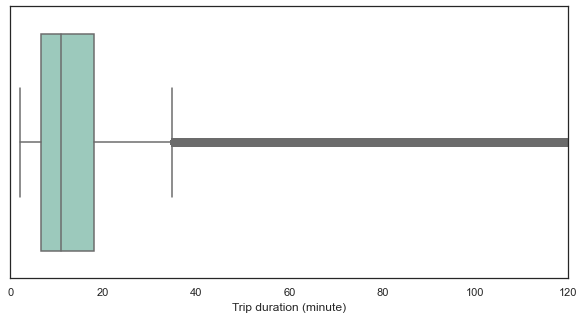

In [49]:
ax = plt.figure(figsize=(10,5))
ax = sns.boxplot(x=trip_data["duration"] / np.timedelta64(1, 'm'))
ax.set(xlim=(0,120))
plt.xlabel("Trip duration (minute)")

This visualization shows that the rental period is usually short. The average is about 15 minutes. This observation supports the assumption that it is mostly locals who use bicycles to get to work or school.

In [50]:
data_boston=trip_data[["hour","duration","date_time","Date","Rented","Weekday"]]


left_mergeT = pd.merge(weather_data,data_boston, on="date_time",how="left")
left_mergeT

,date_time,max_temp,precip,hour,duration,Date,Rented,Weekday
0,2017-01-01 01:00:00,4.4,0.0,1.0,0 days 00:03:16,2017-01-01,1.0,6.0
1,2017-01-01 01:00:00,4.4,0.0,1.0,0 days 00:04:19,2017-01-01,1.0,6.0
2,2017-01-01 01:00:00,4.4,0.0,1.0,0 days 00:03:14,2017-01-01,1.0,6.0
3,2017-01-01 01:00:00,4.4,0.0,1.0,0 days 00:22:53,2017-01-01,1.0,6.0
4,2017-01-01 01:00:00,4.4,0.0,1.0,0 days 00:03:38,2017-01-01,1.0,6.0
...,...,...,...,...,...,...,...,...
1272014,2017-12-31 00:00:00,-7.8,0.0,0.0,0 days 00:23:43,2017-12-31,1.0,6.0
1272015,2017-12-31 00:00:00,-7.8,0.0,0.0,0 days 00:04:58,2017-12-31,1.0,6.0
1272016,2017-12-31 00:00:00,-7.8,0.0,0.0,0 days 00:09:46,2017-12-31,1.0,6.0
1272017,2017-12-31 00:00:00,-7.8,0.0,0.0,0 days 00:05:23,2017-12-31,1.0,6.0


In [51]:
left_mergeT["IsWeekday"] = left_mergeT["Weekday"].apply(lambda x: 1 if x<=4 else 0)
left_mergeT

,date_time,max_temp,precip,hour,duration,Date,Rented,Weekday,IsWeekday
0,2017-01-01 01:00:00,4.4,0.0,1.0,0 days 00:03:16,2017-01-01,1.0,6.0,0
1,2017-01-01 01:00:00,4.4,0.0,1.0,0 days 00:04:19,2017-01-01,1.0,6.0,0
2,2017-01-01 01:00:00,4.4,0.0,1.0,0 days 00:03:14,2017-01-01,1.0,6.0,0
3,2017-01-01 01:00:00,4.4,0.0,1.0,0 days 00:22:53,2017-01-01,1.0,6.0,0
4,2017-01-01 01:00:00,4.4,0.0,1.0,0 days 00:03:38,2017-01-01,1.0,6.0,0
...,...,...,...,...,...,...,...,...,...
1272014,2017-12-31 00:00:00,-7.8,0.0,0.0,0 days 00:23:43,2017-12-31,1.0,6.0,0
1272015,2017-12-31 00:00:00,-7.8,0.0,0.0,0 days 00:04:58,2017-12-31,1.0,6.0,0
1272016,2017-12-31 00:00:00,-7.8,0.0,0.0,0 days 00:09:46,2017-12-31,1.0,6.0,0
1272017,2017-12-31 00:00:00,-7.8,0.0,0.0,0 days 00:05:23,2017-12-31,1.0,6.0,0


In [52]:
del left_mergeT["Weekday"]
del left_mergeT["Date"]
del left_mergeT["duration"]
    #del left_mergeT["min_temp"]
left_mergeT = left_mergeT.dropna()
left_mergeT.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1271767 entries, 0 to 1272018
Data columns (total 6 columns):
 #   Column     Non-Null Count    Dtype         
---  ------     --------------    -----         
 0   date_time  1271767 non-null  datetime64[ns]
 1   max_temp   1271767 non-null  float64       
 2   precip     1271767 non-null  float64       
 3   hour       1271767 non-null  float64       
 4   Rented     1271767 non-null  float64       
 5   IsWeekday  1271767 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 67.9 MB


In [53]:
summe = left_mergeT.groupby("date_time")["Rented"].sum()
df    = pd.DataFrame(summe, columns = ['Rented'])
    #df

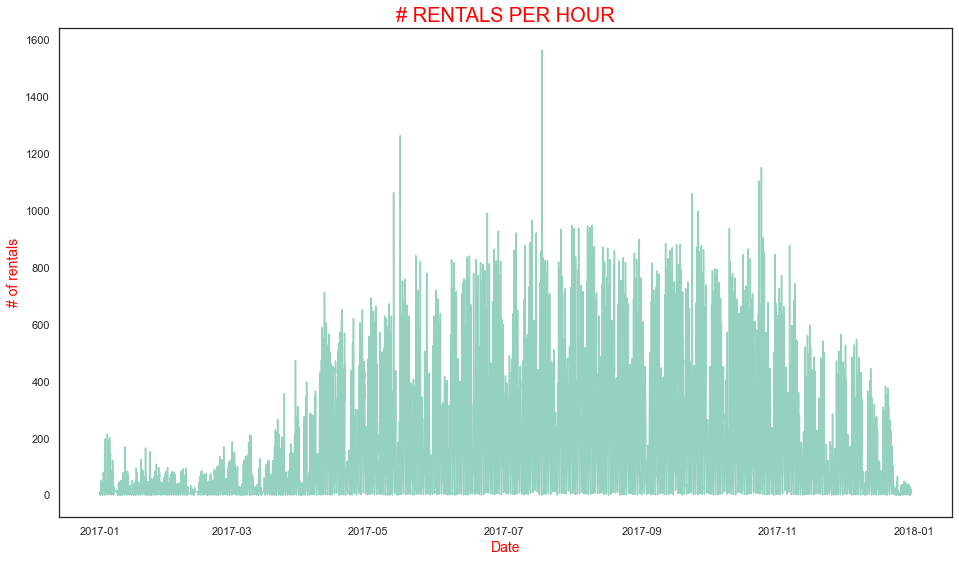

In [54]:
bikes_rented_total = df
fig,ax = plt.subplots(figsize=(16,9)) 

ax.plot(bikes_rented_total)

ax.set_title("# RENTALS PER HOUR", fontsize = 20, fontname = "arial", color = "red")
ax.set_ylabel("# of rentals", fontsize = 14, color = "red")
ax.set_xlabel("Date", fontsize = 14, color = "red")

plt.show()

## Geographical Demand

The analysis of the locations and the geographic demand can provide further information about the reasons for using Blue Bike.

In [55]:
#station_trips= inner_merge.copy()

#del station_trips["start_time"]
#del station_trips["end_time"]
#del station_trips["bike_id"]
#del station_trips["user_type"]
#del station_trips["duration"]
#del station_trips["date_time"]
#del station_trips["hour"]
#del station_trips["Rented"]
#del station_trips["Date"]
#del station_trips["max_temp"]
#del station_trips["min_temp"]
#del station_trips["precip"]
#del station_trips["Rented"]

station_trips=inner_merge[["start_station_id","end_station_id","start_station_name","end_station_name"]]

#stations_start = station_trips.copy()

#del stations_start["end_station_id"]
#del stations_start["end_station_name"]

stations_start= station_trips[["start_station_id","start_station_name"]]

#stations_start

In [56]:
stations_start

,start_station_id,start_station_name
0,67,MIT at Mass Ave / Amherst St
1,36,Boston Public Library - 700 Boylston St.
2,36,Boston Public Library - 700 Boylston St.
3,46,Christian Science Plaza
4,10,B.U. Central - 725 Comm. Ave.
...,...,...
1271762,66,Allston Green District - Griggs St at Commonwe...
1271763,12,Ruggles T Stop - Columbus Ave at Melnea Cass Blvd
1271764,76,Central Sq Post Office / Cambridge City Hall a...
1271765,36,Copley Square - Dartmouth St at Boylston St


In [57]:
left=stations_start
right=station_location


station_loc = pd.merge(left=left, right=right, left_on="start_station_name", right_on="Name")

del station_loc["start_station_name"]
del station_loc["Number"]
del station_loc["District"]
del station_loc["Public"]
del station_loc["Total Docks"]

station_loc = station_loc.drop_duplicates(subset=None, keep='first', inplace=False, ignore_index=True)
station_loc.Latitude = station_loc.Latitude.astype(float)
station_loc.Longitude = station_loc.Longitude.astype(float)
#station_loc

In [58]:
station_loc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166 entries, 0 to 165
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   start_station_id  166 non-null    int64  
 1   Name              166 non-null    object 
 2   Latitude          166 non-null    float64
 3   Longitude         166 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 5.3+ KB


In [59]:
left=trip_data
right=station_loc


station_tours = pd.merge(left=left, right=right, left_on="start_station_id", right_on="start_station_id")
station_tours = pd.merge(left=station_tours, right=right, left_on="end_station_id", right_on="start_station_id")

station_tours_hour=station_tours[["start_station_id_x","end_station_id","start_station_name","end_station_name","hour",
    "Rented","Latitude_x","Longitude_x","start_station_id_y","Latitude_y","Longitude_y"]]

station_tours_hour["Coordinates_orig"] = list(zip(station_tours_hour["Latitude_x"].round(4),station_tours_hour["Longitude_x"].round(4)))
station_tours_hour["Coordinates_dest"] = list(zip(station_tours_hour["Latitude_y"].round(4),station_tours_hour["Longitude_y"].round(4)))


station_tours = station_tours.drop_duplicates(subset=None, keep='first', inplace=False, ignore_index=True)
popular_station = inner_merge2.head(1)
station_tours_top = station_tours_hour[station_tours_hour["start_station_id_x"].isin(popular_station.index)]
del station_tours_top["hour"]
station_tours_top = station_tours_top.drop_duplicates(subset=None, keep='first', inplace=False, ignore_index=True)

tours_eve = station_tours_hour[(station_tours_hour["hour"]> 15)&
                           (station_tours_hour["hour"]< 20)]

tours_mrng = station_tours_hour[(station_tours_hour["hour"]> 5)&
                           (station_tours_hour["hour"]< 10)]


station_tours.reset_index()
#station_tours_hour

<ipython-input-59-b29d54f54d92>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station_tours_hour["Coordinates_orig"] = list(zip(station_tours_hour["Latitude_x"].round(4),station_tours_hour["Longitude_x"].round(4)))
<ipython-input-59-b29d54f54d92>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station_tours_hour["Coordinates_dest"] = list(zip(station_tours_hour["Latitude_y"].round(4),station_tours_hour["Longitude_y"].round(4)))


,index,start_time,end_time,start_station_id_x,end_station_id,start_station_name,end_station_name,bike_id,user_type,hour,...,Date,Rented,Weekday,Name_x,Latitude_x,Longitude_x,start_station_id_y,Name_y,Latitude_y,Longitude_y
0,0,2017-01-01 00:06:58,2017-01-01 00:12:49,67,139,MIT at Mass Ave / Amherst St,Dana Park,644,Subscriber,0,...,2017-01-01,1,6,MIT at Mass Ave / Amherst St,42.358100,-71.093198,139,Dana Park,42.361780,-71.108100
1,1,2017-01-03 16:53:01,2017-01-03 17:37:24,67,139,MIT at Mass Ave / Amherst St,Dana Park,379,Subscriber,16,...,2017-01-03,1,1,MIT at Mass Ave / Amherst St,42.358100,-71.093198,139,Dana Park,42.361780,-71.108100
2,2,2017-01-03 20:12:10,2017-01-03 20:19:04,67,139,MIT at Mass Ave / Amherst St,Dana Park,807,Subscriber,20,...,2017-01-03,1,1,MIT at Mass Ave / Amherst St,42.358100,-71.093198,139,Dana Park,42.361780,-71.108100
3,3,2017-01-04 14:26:21,2017-01-04 14:33:09,67,139,MIT at Mass Ave / Amherst St,Dana Park,855,Subscriber,14,...,2017-01-04,1,2,MIT at Mass Ave / Amherst St,42.358100,-71.093198,139,Dana Park,42.361780,-71.108100
4,4,2017-01-09 20:37:48,2017-01-09 20:45:25,67,139,MIT at Mass Ave / Amherst St,Dana Park,245,Subscriber,20,...,2017-01-09,1,0,MIT at Mass Ave / Amherst St,42.358100,-71.093198,139,Dana Park,42.361780,-71.108100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1028480,1028480,2017-09-26 10:15:55,2017-09-26 10:36:29,212,217,Maverick Square - Lewis Mall,Orient Heights T Stop - Bennington St at Sarat...,546,Subscriber,10,...,2017-09-26,1,1,Maverick Square - Lewis Mall,42.368844,-71.039778,217,Orient Heights T Stop - Bennington St at Sarat...,42.386781,-71.006098
1028481,1028481,2017-10-08 15:49:01,2017-10-08 16:08:59,212,217,Maverick Square - Lewis Mall,Orient Heights T Stop - Bennington St at Sarat...,426,Customer,15,...,2017-10-08,1,6,Maverick Square - Lewis Mall,42.368844,-71.039778,217,Orient Heights T Stop - Bennington St at Sarat...,42.386781,-71.006098
1028482,1028482,2017-10-18 13:45:18,2017-10-18 14:07:40,212,217,Maverick Square - Lewis Mall,Orient Heights T Stop - Bennington St at Sarat...,1877,Subscriber,13,...,2017-10-18,1,2,Maverick Square - Lewis Mall,42.368844,-71.039778,217,Orient Heights T Stop - Bennington St at Sarat...,42.386781,-71.006098
1028483,1028483,2017-11-23 13:21:23,2017-11-23 13:37:34,212,217,Maverick Square - Lewis Mall,Orient Heights T Stop - Bennington St at Sarat...,1865,Subscriber,13,...,2017-11-23,1,3,Maverick Square - Lewis Mall,42.368844,-71.039778,217,Orient Heights T Stop - Bennington St at Sarat...,42.386781,-71.006098


In [60]:
#station_tours_top

### Tours starting from the most popular station

In [61]:
#define empty map

STR_map_tours = folium.Map(location=(42.3581,-71.093198),  tiles='Stamen Toner', 
                       zoom_start=12, control_scale=True, max_zoom=20)

for i in range(station_tours_top["Latitude_x"].count()):
    folium.PolyLine([(station_tours_top["Latitude_x"].iloc[i], station_tours_top["Longitude_x"].iloc[i]),(station_tours_top["Latitude_y"].iloc[i],station_tours_top["Longitude_y"].iloc[i])]).add_to(STR_map_tours)

folium.CircleMarker(radius=5, location=(station_tours_top["Latitude_x"].iloc[1], station_tours_top["Longitude_x"].iloc[1]), popup= station_tours_top["start_station_name"].iloc[1], 
                              color='red', fill_color='red').add_to(STR_map_tours)                    
                    
STR_map_tours

If you look at which stations are served by the most popular station "MIT at Mass Ave / Amherst St", it becomes apparent that these are distributed over the entire city area.

#### Popularity of start stations

heatmap_bb_start = folium.Map(location=(42.34178089,-71.03987017),  tiles='Stamen Toner', 
                       zoom_start=12, control_scale=True, max_zoom=20)

hm(station_tours_hour["Coordinates_orig"]).add_to(heatmap_bb_start)
heatmap_bb_start

#### Populartiy of end stations

heatmap_bb_end= folium.Map(location=(42.34178089,-71.03987017),  tiles='Stamen Toner', 
                       zoom_start=12, control_scale=True, max_zoom=20)

hm(station_tours_hour["Coordinates_orig"]).add_to(heatmap_bb_end)
heatmap_bb_end

#### Popularity of end stations (morning)

heatmap_bb_end_mrng= folium.Map(location=(42.34178089,-71.03987017),  tiles='Stamen Toner', 
                       zoom_start=12, control_scale=True, max_zoom=20)

hm(tours_mrng["Coordinates_dest"]).add_to(heatmap_bb_end_mrng)
heatmap_bb_end_mrng

#### Popularity of end stations (evening)

heatmap_bb_end_eve = folium.Map(location=(42.34178089,-71.03987017),  tiles='Stamen Toner', 
                       zoom_start=12, control_scale=True, max_zoom=20)


hm(tours_eve["Coordinates_dest"]).add_to(heatmap_bb_end_eve)
heatmap_bb_end_eve

### Location and popularty of stations

The exact locations of the stations are shown, supplemented by their popularity and rental figures. To make it easier to perceive, the color scheme has been adapted to the respective "popularity category".

In [62]:
left = inner_merge2
right = station_loc

station_rentals = pd.merge(left=left, right=right, left_on="start_station_id", right_on="start_station_id")
#station_rentals

In [63]:
def number_DivIcon(color,number):
    """ Create a 'numbered' icon
    
    """
    icon = DivIcon(
            icon_size=(150,36),
            icon_anchor=(14,40),
#             html='<div style="font-size: 18pt; align:center, color : black">' + '{:02d}'.format(num+1) + '</div>',
            html="""<span class="fa-stack " style="font-size: 12pt" >>
                    <!-- The icon that will wrap the number -->
                    <span class="fa fa-circle-o fa-stack-2x" style="color : {:s}"></span>
                    <!-- a strong element with the custom content, in this case a number -->
                    <strong class="fa-stack-1x" style="font-size: 12pt">
                         {:02d} 
                    </strong>
                </span>""".format(color,number)
        )
    return icon

In [64]:
# Create base map
Boston = (42.34178089,-71.03987017)
map = folium.Map(location = Boston,
 zoom_start = 12,
 tiles = "CartoDB positron")


col_hex = ['#6FCCDD', 
           '#00517C',
           '#84C440',
           '#2F6D36',
           '#F8E318',
           '#DEB625',
           '#FAAF17',
           '#F26721',
           '#E32925',
           '#5e2028']

for i in range(station_rentals["Latitude"].count()):
    count = station_rentals["Rented_x"].iloc[i]
    
    
    if count < 500: 
        num = 0
    elif (count > 500) & (count < 1000):
        num = 1
    elif (count > 1000) & (count < 2500):
        num = 2
    elif (count > 1000) & (count < 2500):
        num = 3
    elif (count > 5000) & (count < 10000):
        num = 4
    elif (count > 10000) & (count < 15000):
        num = 5
    elif (count > 15000) & (count < 20000):
        num = 6
    elif (count > 20000) & (count < 25000):
        num = 7
    elif (count > 25000) & (count < 35000):
        num = 8
    elif (count > 35000):
        num = 9
        
    loc = (station_rentals["Latitude"].iloc[i], station_rentals["Longitude"].iloc[i])
    folium.Marker(
        location=loc,
        popup="Rentals at "+ station_rentals["start_station_name"].iloc[i]+": " + '{:02d}'.format(count),
        icon=folium.Icon(color='white',icon_color='white'),
        markerColor=col_hex[num],
    ).add_to(map)
    folium.Marker(
        location=loc,
        popup="Rentals at "+ station_rentals["start_station_name"].iloc[i]+": " + '{:02d}'.format(count),
        icon= number_DivIcon(col_hex[num],num+1)
    ).add_to(map)

map

## Selecting the Key Performance Indicators

A first Indicator could be the utilization ratio of the bicicles, to see how many bicicles are on the strett or how many are just waiting at station, so the managers could decide to increase or decrease the total number of bicicles. Futhermore, this KPI can be expanded to utilization ration of the bicicles at a specfic station to examine the uitlization at an popular station for example, so the manager could sent more bikes to this particular station.

Another KPI could be the number of borrowed bikes last hour in proportion of a benchmark. The benchmark can be a indicator for the profit and answers the question: "How many bikes need to be rented to make profit?". So this ratio gives info of how many percent of the break even point is reached. (For simplification we will use the mean value as benchmark) This KPI can be spilted into number of borrowed bikes form customer and from subscribers due to the  fact that there may exist different prices for customer and subcriber.
In summary this KPI shows whether the company is making money

A third KPI could be subscriber/ customer ratio. This KPI gives info of how many percent of the bikes from the last hour has been rented by subscribers or customers. This Key Performance Indicator can be interesting for the marketing department of a company in order to design appropriate advertising 


### Utilization ratio

In [65]:
a = inner_merge["bike_id"]
a = a.unique()
a.size

1799

In [66]:
#extract the prime hour from a random data
rdb = trip_data[["date_time","bike_id"]]
b = rdb.value_counts()
rdb = rdb.set_index(["date_time"])
#rdb.loc["2017-06-01 07:00:00"]

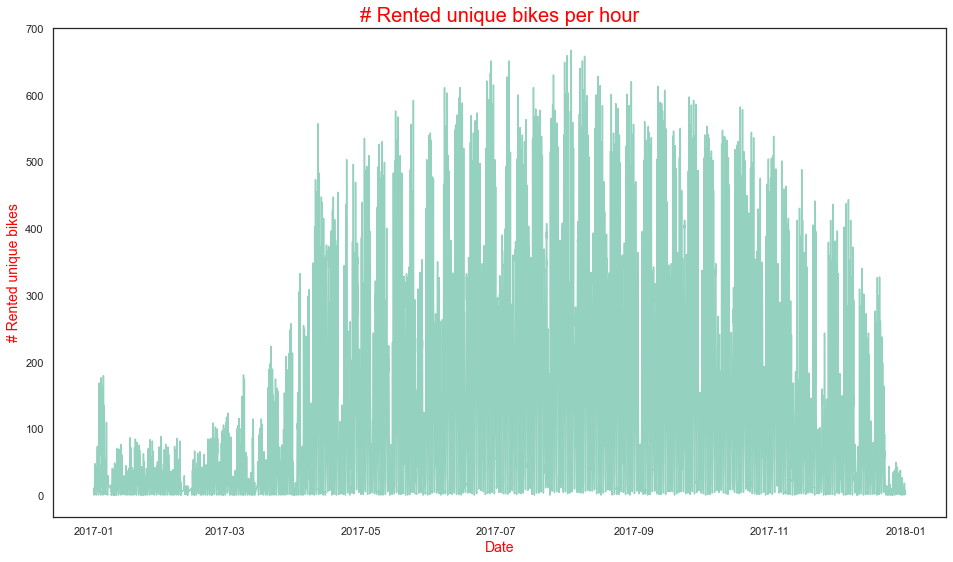

In [67]:
b  = pd.DataFrame(b)
b2 = b.value_counts(subset='date_time')

b2 = pd.DataFrame(b2)
b2 = b2.sort_values(by='date_time')
bikes_rented_total = b2
fig,ax = plt.subplots(figsize=(16,9)) 

ax.plot(bikes_rented_total)

ax.set_title("# Rented unique bikes per hour", fontsize = 20, fontname = "arial", color = "red")
ax.set_ylabel("# Rented unique bikes", fontsize = 14, color = "red")
ax.set_xlabel("Date", fontsize = 14, color = "red")

plt.show()

If we compare this Graph with the Graph about the total rentals per hour over a year, you can see that we have a peek demand of approximately 1500 but the peek of rented unique bikes per hour is around 650 because a bike can rented multiple times in hour especially when the time period of the rent is short.

In [68]:
b2
xur=b2.loc["2017-06-01 00:00:00":"2017-06-01 23:00:00"]
#yur=np.arange(1,25)
#yur
xur=xur/1799
#xur

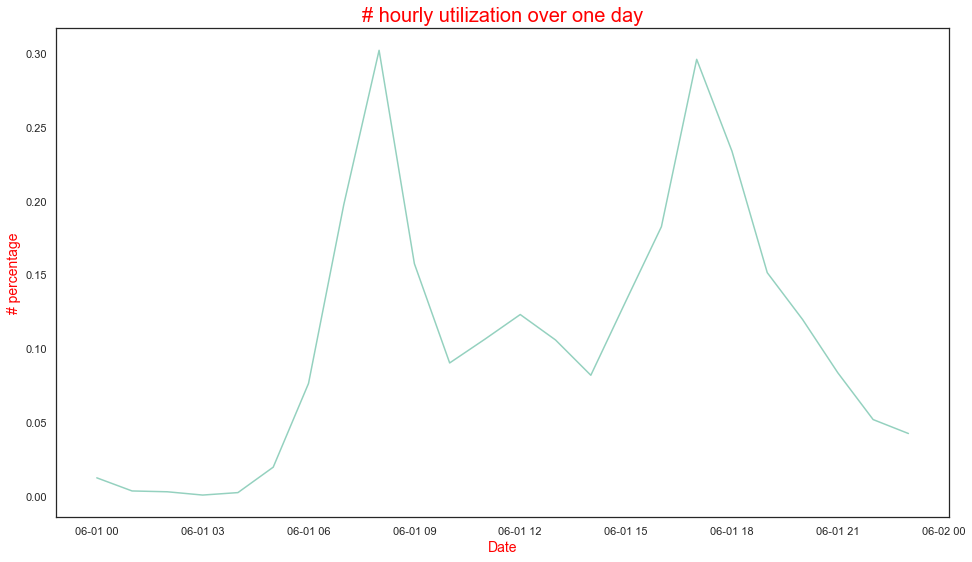

In [69]:

fig,ax = plt.subplots(figsize=(16,9)) 

ax.plot(xur)

ax.set_title("# hourly utilization over one day", fontsize = 20, fontname = "arial", color = "red")
ax.set_ylabel("# percentage", fontsize = 14, color = "red")
ax.set_xlabel("Date", fontsize = 14, color = "red")

plt.show()



As we can see in Graph from above the highest utilization over the day was 30 percent. The Graph uses the data from the first of June 2017. The Graph looks similar to the Graph in the section about the fleet usage during a day because the number of rentals is related to the number of unique rented bikes. But if u take a closer look there are some differences due to the fact that this Graph do not shows rentals of the same bike within a hour.

### Number of borrowed bikes last hour benchmark ratio

As mentioned above we will use the average number of borrowed bikes within a hour in the further course of the analysis

In [70]:
linie=trip_data.groupby(["date_time"], as_index=False)["Rented"].sum()
linie2=linie["Rented"]
linie2
h=np.sum(linie2)
p=linie2.size
gerade=h/p
y=np.full((24),gerade)
#y

<function matplotlib.pyplot.show(close=None, block=None)>

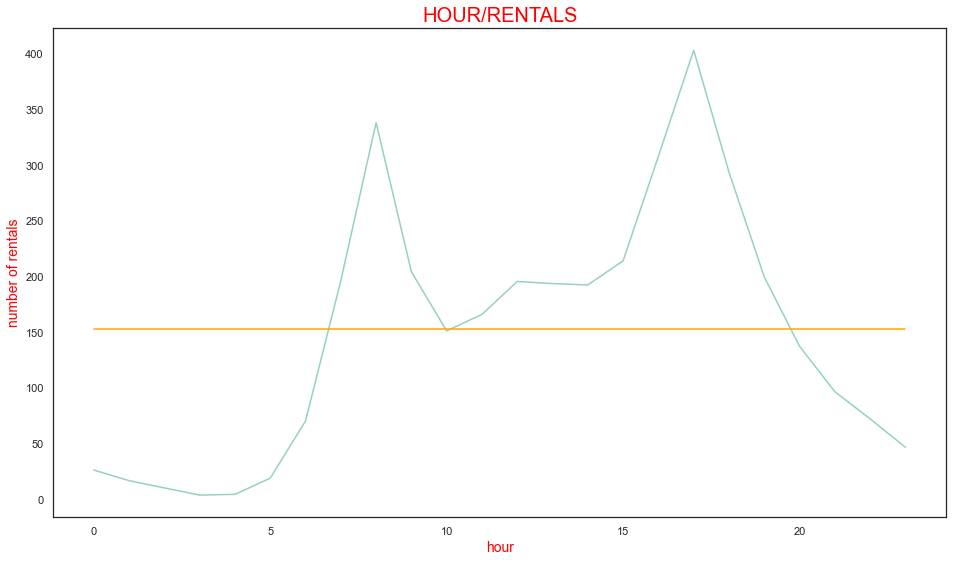

In [71]:
hourly_rentals = trip_data.groupby(["hour"], as_index=False)["Rented"].sum()
xh=hourly_rentals["hour"]
yh=hourly_rentals["Rented"]/365

Fig_3, ax_3    = plt.subplots(figsize=(16,9))

ax_3.plot(xh,yh)
ax_3.plot(xh,y, color="orange")

ax_3.set_title("HOUR/RENTALS", fontsize = 20, fontname = "arial", color = "red")
ax_3.set_ylabel("number of rentals", fontsize = 14, color = "red")
ax_3.set_xlabel("hour", fontsize = 14, color = "red")


plt.show


First we have to compute the mean value of the renatls per hour because we do not know the break even point of the company so we use the mean value of rentals per hour as a replacement.

In [72]:
scr=trip_data[["date_time","Rented"]]
#scr=scr.set_index(["date_time"])
ratio=scr.groupby(["date_time"], as_index=False)["Rented"].sum()
ratio=ratio.set_index(["date_time"])
ratio=ratio.loc["2017-06-01 00:00:00":"2017-06-01 23:00:00"]
ratio2=ratio/gerade
ratio3=ratio/ratio

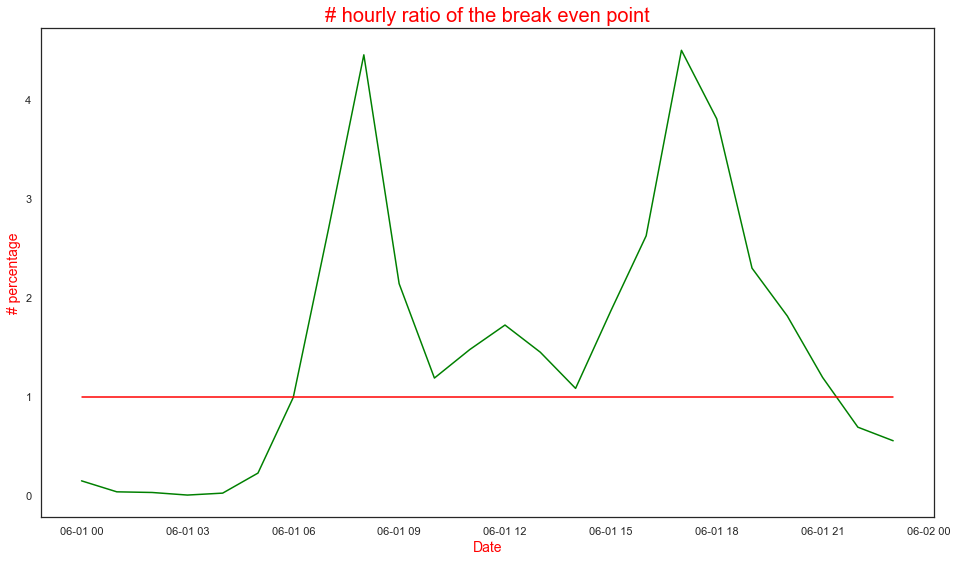

In [73]:

fig,ax = plt.subplots(figsize=(16,9)) 

ax.plot(ratio2, color="green")
ax.plot(ratio3, color="red")

ax.set_title("# hourly ratio of the break even point", fontsize = 20, fontname = "arial", color = "red")
ax.set_ylabel("# percentage", fontsize = 14, color = "red")
ax.set_xlabel("Date", fontsize = 14, color = "red")

plt.show()



### Subscriber customer ratio

In [74]:
scr= trip_data[["user_type","Date"]]
scrd= pd.get_dummies(scr["user_type"])
scr["Customer"]=scrd["Customer"]
scr["Subscriber"]=scrd["Subscriber"]
scr

xscr=scr.groupby(["Date"], as_index=False)["Customer"].sum()
xscr2=scr.groupby(["Date"], as_index=False)["Subscriber"].sum()

y=xscr["Date"]
x1=xscr["Customer"]
x2=xscr2["Subscriber"]

#xscr2

<ipython-input-74-6d3dd81eef8b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scr["Customer"]=scrd["Customer"]
<ipython-input-74-6d3dd81eef8b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scr["Subscriber"]=scrd["Subscriber"]


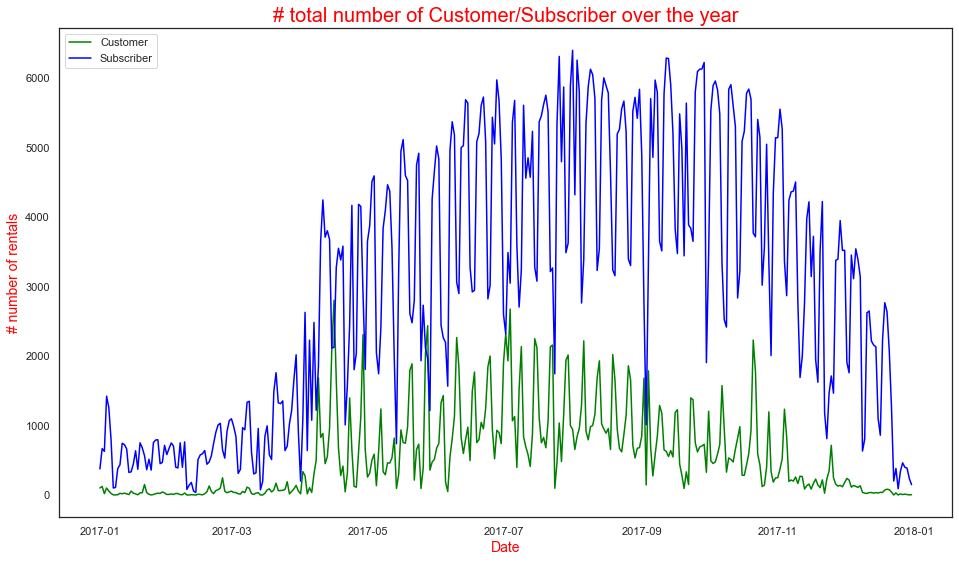

In [75]:

fig,ax = plt.subplots(figsize=(16,9)) 

ax.plot(y,x1, label="Customer", color="green")
ax.plot(y,x2, label="Subscriber", color="blue")

ax.set_title("# total number of Customer/Subscriber over the year", fontsize = 20, fontname = "arial", color = "red")
ax.set_ylabel("# number of rentals", fontsize = 14, color = "red")
ax.set_xlabel("Date", fontsize = 14, color = "red")

plt.legend(loc="upper left")

plt.show()

This Graph shows the total number of rentals booked by a customer or a subscriber over a year. As expected there are much more rentals by subscribers than from customers due to the fact that the bikes are mostly used for the way to work

In [76]:
a=np.sum(x1)
b=np.sum(x2)
c=np.sum(trip_data["Rented"])

a=a/c
b=b/c

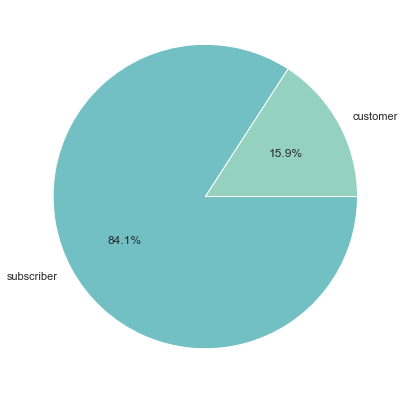

In [77]:
user_type="customer","subscriber"
data=[a,b]

fig, ax1 =plt.subplots(figsize=(7,7))
ax1.pie(data,labels=user_type, autopct="%1.1f%%")

plt.show()

This Pie chart confirms the assumptions from the last Graph that the majority of bikes is rented by a subscriber

In [78]:
#extract the prime hour from a random data
rdb = trip_data[["date_time","bike_id"]]
b = rdb.value_counts()
rdb = rdb.set_index(["date_time"])
#rdb.loc["2017-06-01 07:00:00"]

In [79]:
scr=trip_data[["date_time", "user_type","Rented"]]
scrd= pd.get_dummies(scr["user_type"])

scr["Customer"]=scrd["Customer"]
scr["Subscriber"]=scrd["Subscriber"]

scr=scr.set_index(["date_time"])
scr=scr.loc["2017-06-01 00:00:00":"2017-06-01 23:00:00"]
scr

x1=scr.groupby(["date_time"], as_index=False)["Customer"].sum()
x2=scr.groupby(["date_time"], as_index=False)["Subscriber"].sum()
x3=scr.groupby(["date_time"], as_index=False)["Rented"].sum()

x1=x1["Customer"]
x2=x2["Subscriber"]
x3=x3["Rented"]

y1=np.arange(0,24)


x1=(x1/x3)*100
x2=(x2/x3)*100
#x2

<ipython-input-79-70cebf092fad>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scr["Customer"]=scrd["Customer"]
<ipython-input-79-70cebf092fad>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scr["Subscriber"]=scrd["Subscriber"]


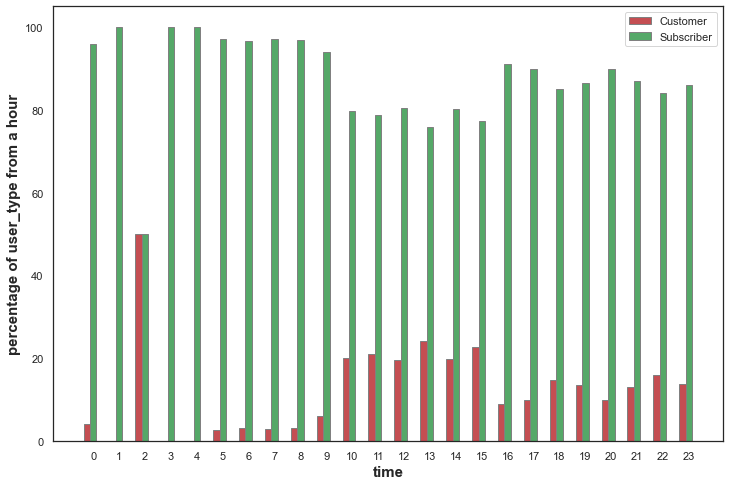

In [80]:
# set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))
 
# set height of bar
#IT = [12, 30, 1, 8, 22]
#ECE = [28, 6, 16, 5, 10]
#CSE = [29, 3, 24, 25, 17]
 
# Set position of bar on X axis
br1 = np.arange(len(x1))
br2 = [x + barWidth for x in br1]

 
# Make the plot
plt.bar(br1, x1, color ='r', width = barWidth,
        edgecolor ='grey', label ='Customer')
plt.bar(br2, x2, color ='g', width = barWidth,
        edgecolor ='grey', label ='Subscriber')

 
# Adding Xticks
plt.xlabel('time', fontweight ='bold', fontsize = 15)
plt.ylabel('percentage of user_type from a hour', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(x1))],y1)
 
plt.legend()
plt.show()

The bar plot from above shows the percentage of rentals by a customer and a subscriber over an hour over one day. The day selected is the first of june 2017 like in the Graph from the utilization ratio

$\;\;\;\;\;\;$
# `Task 3) Descriptive Analysis:`

## Select input features for the prediction

In [81]:
inner_merge
wr = inner_merge.groupby(["max_temp"], as_index=False)["Rented"].sum()

In [82]:
yp = wr['Rented']
xp = wr['max_temp']

[6384.23120674 8309.79916837 8485.27715514 8281.91758656]


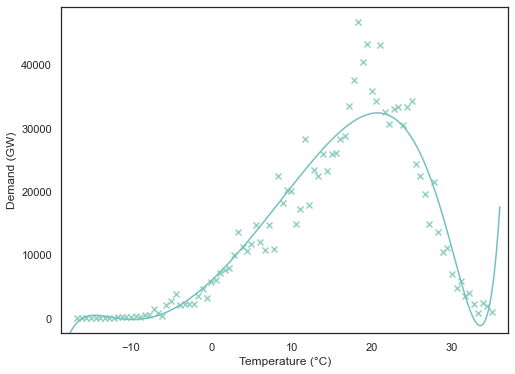

In [83]:
plot_regularized_polyregression(xp,yp,0.1, 15)

The first input feature that we selected was the temperature. As the graph depicts the temperature has a huge impact on the demand so the prediction can vary strongly if you do not pay attention to the temperature. As we can see there is peak demand around 20 degree.

<function matplotlib.pyplot.show(close=None, block=None)>

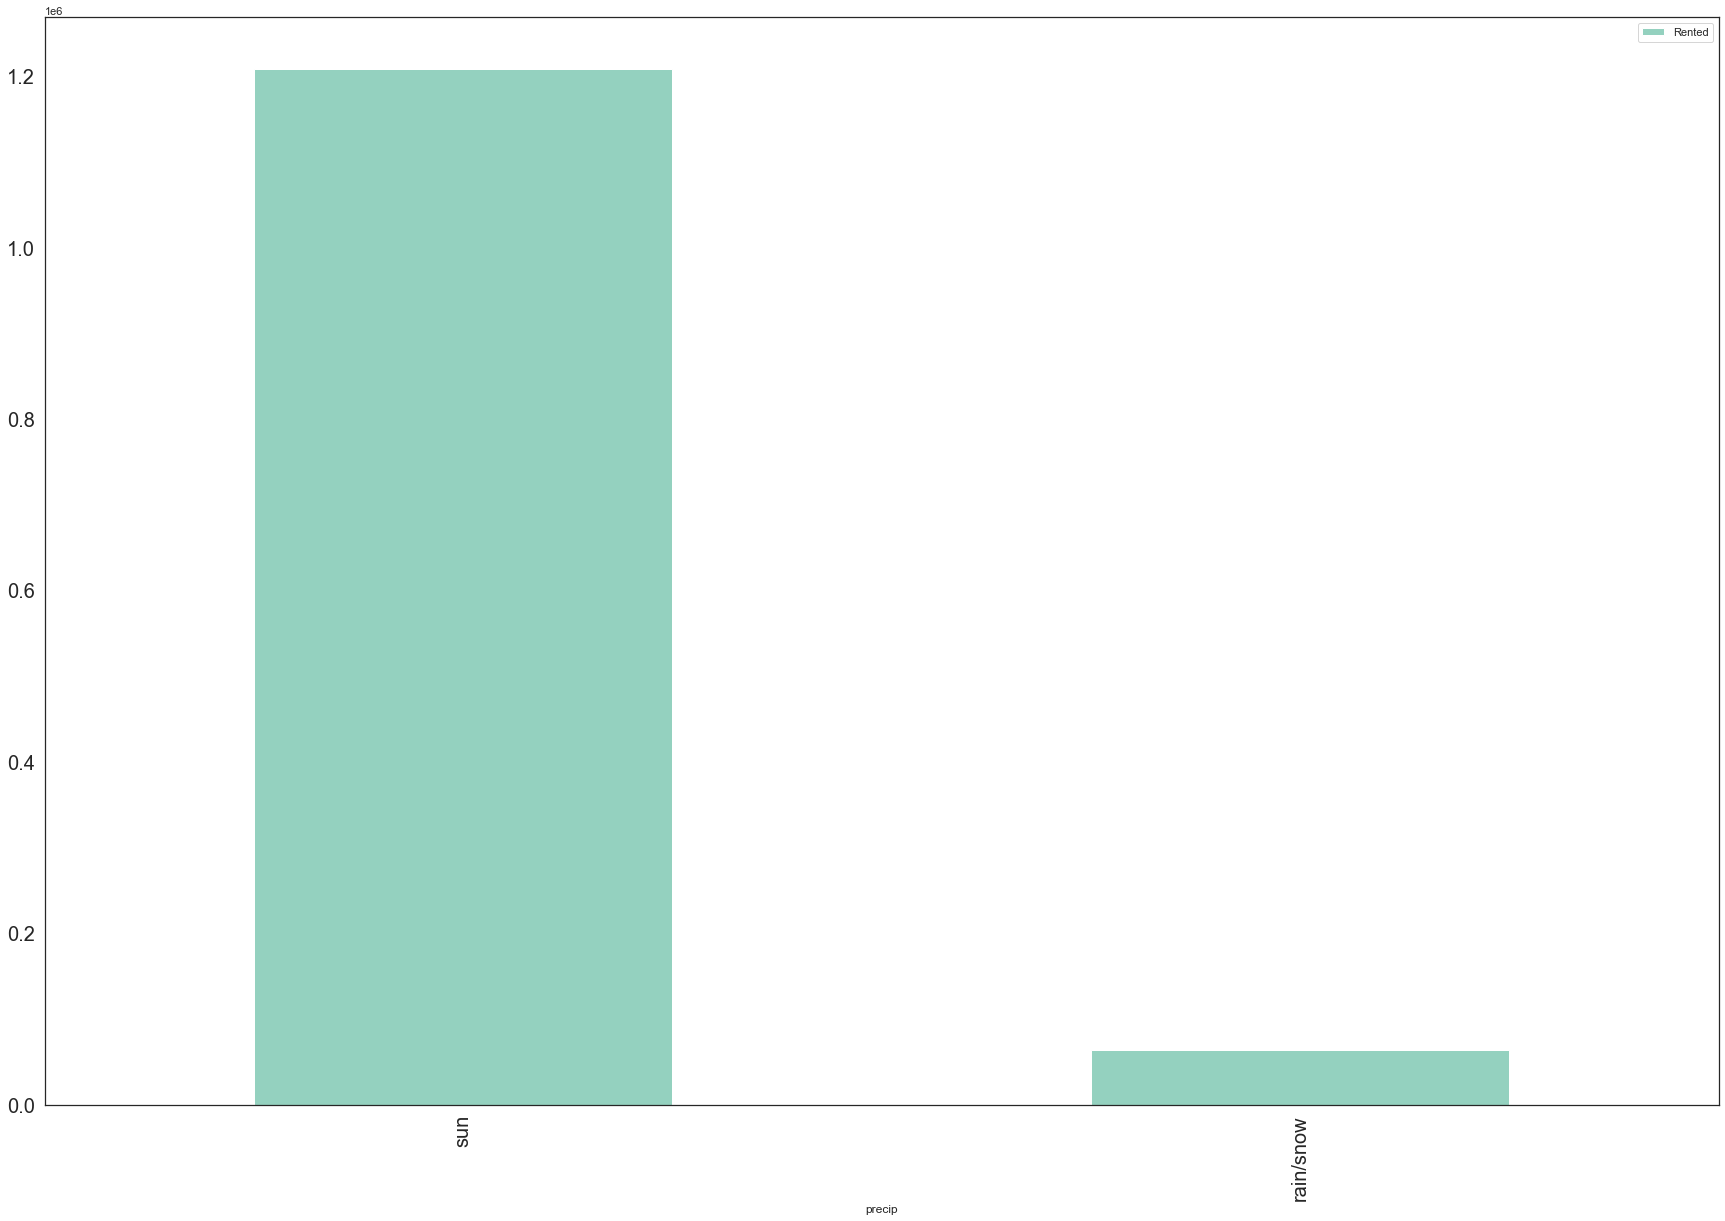

In [84]:
left  = trip_data
right = weather_data


inner_merge3 = pd.merge(left=left, right=right, left_on="date_time", right_on="date_time")


station_rentals=inner_merge3.groupby("precip")["Rented"].sum()

df3 = pd.DataFrame(station_rentals, columns = ['precip','Rented'])
df3.plot.bar(x = 'precip', y = 'Rented',figsize=(30,20),fontsize = 20)
bars = ['sun', 'rain/snow']
y_pos = np.arange(len(bars))

# Create names on the x-axis
plt.xticks(y_pos, bars)
plt.show

The second input feature we selected is the precip from the weather data. As the Graph suggests almost nobody compared to the sunny weather rents a bike if it raining or snowing so we decided to make a dummy variable wheater it is raining or not.

In [85]:
weekday_rentals= trip_data.groupby(["Weekday"], as_index=False)["Rented"].sum()
weekday_rentals=weekday_rentals.set_index(["Weekday"])
weekday_rentals
y=weekday_rentals["Rented"]
y=np.sum(y)
y=y/7
x1=weekday_rentals.loc["5":"6"]
x1=x1["Rented"]
x1=np.sum(x1)
x2=weekday_rentals.loc["0":"4"]
x2=x2["Rented"]
x2=np.sum(x2)
x2=(x2/5)/y
x1=(x1/2)/y

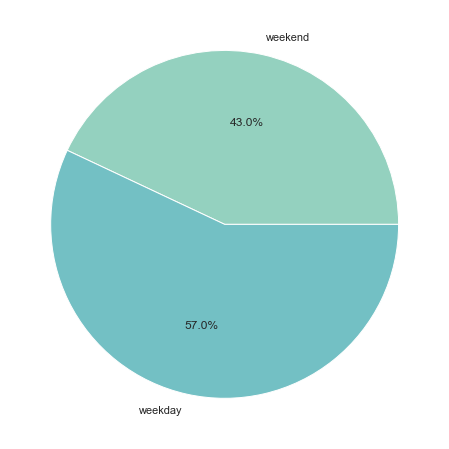

In [86]:
weekday="weekend","weekday"
data=[x1,x2]

fig, ax1 =plt.subplots(figsize=(8,8))
ax1.pie(data,labels=weekday, autopct="%1.1f%%")

plt.show()

Due to the fact most people work during the week and not at the weekend there a more rentals during the weekdays than during the weekend. As the Graph shows there are approximatly 50% more rentals in one weekday than in one day at the weekend. Therefore we decided to make a dummy varible for our prediction wheater it is during the week or at the weekend.

In [87]:
trip_datas = raw_data_boston 
trip_datas["start_time"] = pd.to_datetime(trip_data["start_time"], format="%Y/%m/%d %H:%M:")
trip_datas["end_time"]   = pd.to_datetime(trip_data["end_time"], format="%Y/%m/%d %H:%M:")

trip_datas["hour"]     = trip_data["start_time"].dt.hour
trip_datas["year"]     = trip_data["start_time"].dt.year
trip_datas["month"]    = trip_data["start_time"].dt.month
trip_datas["day"]      = trip_data["start_time"].dt.day
trip_datas["minute"]= trip_data["start_time"].dt.minute
trip_datas["seconds"]  = trip_data["start_time"].dt.second
trip_datas["duration"] = trip_data["end_time"] - trip_data["start_time"]

df1 = pd.DataFrame({'year':"2017",'month':"1",
                 'day':"1",
                 'hour':trip_datas["hour"], 'minute':trip_datas["minute"]})
df1 = pd.to_datetime(df1, format="%Y/%m/%d %H:%M:")
trip_datas["x2"] = df1

trip_datas.drop([("year"),("month"),("day"),("seconds"),("minute")], axis = 1, inplace = True)

trip_datas["Rented"]=1
#trip_datas


In [88]:
graph_data=trip_datas.groupby(["x2"], as_index=False)["Rented"].sum()
graph_data
y3=graph_data["x2"]
x1=graph_data["Rented"]


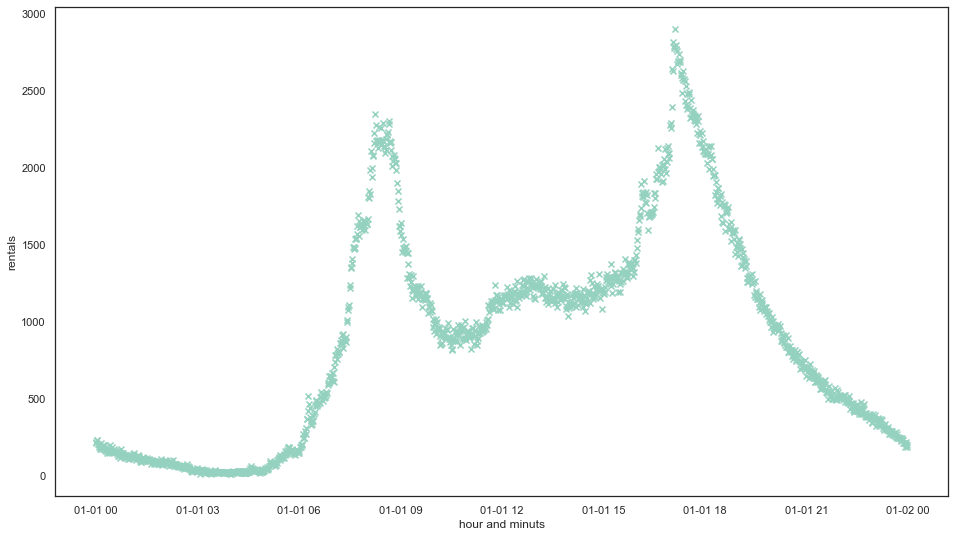

In [89]:
plt.figure(figsize = (16,9))
plt.scatter(y3,x1, marker="x")
plt.xlabel("hour and minuts")
plt.ylabel("rentals")
plt.show()

For our last input feature we decided to take a closer look at the relation between daytime and rentals. As we can see the demand starts to increase from 6 am and starts to decrease from 19 pm. Moreover there is peak demand between 6 and 9pm and between 16 and 19pm due to working hours. As a result there are strong fluctuations of the demand during the day so this featrue improves the predictive power.

#### Details to Task 3 
#### TODO Detailed introduction to task 3 here

In [90]:
left_mergeT2 = left_mergeT.drop_duplicates(subset=["date_time"], keep='first', inplace=False, ignore_index=False)
del left_mergeT2['Rented']
left_mergeT3 = pd.merge(left_mergeT2,df, on="date_time",how="left")
left_mergeT3.set_index("date_time",inplace=True)
left_mergeT3.head(10)

,max_temp,precip,hour,IsWeekday,Rented
date_time,,,,,
2017-01-01 01:00:00,4.4,0.0,1.0,0,7.0
2017-01-01 02:00:00,5.0,1.0,2.0,0,4.0
2017-01-01 03:00:00,5.0,1.0,3.0,0,2.0
2017-01-01 04:00:00,5.0,1.0,4.0,0,6.0
2017-01-01 05:00:00,4.4,1.0,5.0,0,1.0
2017-01-01 00:00:00,3.9,0.0,0.0,0,13.0
2017-01-02 01:00:00,2.8,0.0,1.0,1,2.0
2017-01-02 02:00:00,2.8,0.0,2.0,1,2.0
2017-01-02 03:00:00,1.7,0.0,3.0,1,1.0


In [91]:
from sklearn import preprocessing
from sklearn.preprocessing import scale

left_mergeT2 = left_mergeT.drop_duplicates(subset=["date_time"], keep='first', inplace=False, ignore_index=False)
del left_mergeT2['Rented']
left_mergeT3 = pd.merge(left_mergeT2,df, on="date_time",how="left")
#left_mergeT3.set_index("date_time",inplace=True)
del left_mergeT3['date_time']
temp   = left_mergeT3['max_temp'].values.reshape(-1,1)
scaled = preprocessing.MinMaxScaler()
left_mergeT3['max_temp'] = scaled.fit_transform(temp)

temp   = left_mergeT3['precip'].values.reshape(-1,1)
scaled = preprocessing.MinMaxScaler()
left_mergeT3['precip'] = scaled.fit_transform(temp)

temp   = left_mergeT3['hour'].values.reshape(-1,1)
scaled = preprocessing.MinMaxScaler()
left_mergeT3['hour'] = scaled.fit_transform(temp)

temp   = left_mergeT3['IsWeekday'].values.reshape(-1,1)
scaled = preprocessing.MinMaxScaler()
left_mergeT3['IsWeekday'] = scaled.fit_transform(temp)

left_mergeT3.head(50)

,max_temp,precip,hour,IsWeekday,Rented
0,0.408124,0.0,0.043478,0.0,7.0
1,0.419729,1.0,0.086957,0.0,4.0
2,0.419729,1.0,0.130435,0.0,2.0
3,0.419729,1.0,0.173913,0.0,6.0
4,0.408124,1.0,0.217391,0.0,1.0
5,0.398453,0.0,0.000000,0.0,13.0
6,0.377176,0.0,0.043478,1.0,2.0
7,0.377176,0.0,0.086957,1.0,2.0
8,0.355899,0.0,0.130435,1.0,1.0
9,0.334623,0.0,0.217391,1.0,2.0


In [92]:
X = left_mergeT3[['max_temp','precip','hour','IsWeekday']].values
Y = left_mergeT3['Rented'].values
X

array([[0.40812379, 0.        , 0.04347826, 0.        ],
       [0.41972921, 1.        , 0.08695652, 0.        ],
       [0.41972921, 1.        , 0.13043478, 0.        ],
       ...,
       [0.16247582, 1.        , 0.91304348, 0.        ],
       [0.16247582, 1.        , 0.95652174, 0.        ],
       [0.172147  , 0.        , 0.        , 0.        ]])

In [93]:
b = np.array([Y])
Y = b.T
Y

array([[ 7.],
       [ 4.],
       [ 2.],
       ...,
       [11.],
       [ 6.],
       [ 6.]])

## Predicting hourly demand with KNN Regression

In [94]:
from sklearn.neighbors import KNeighborsRegressor
# Do a 70-30 split first
x_train20, x_test20, y_train20, y_test20 = train_test_split(X, Y, test_size=0.3,random_state=34 )

# now split X_train to achive 50-20-30 split
x_train20, x_hold20, y_train20, y_hold20 = train_test_split(x_train20, y_train20, test_size=(0.2/0.7),random_state=34 )

def find_neighbors (x,y):
    
    # define list for collecting results
    err_train = [] 
    err_test  = []
    
    # split data
    # x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3,random_state=10)
    
    #loop over max_depth
    
    for n in np.arange(1,40): # lets test until 24 for now
        
        # fit model
        
        KNN_reg1 = KNeighborsRegressor(n_neighbors=n)
        KNN_model = KNN_reg1.fit(x_train20, y_train20) 
        
        # compute errors
        
        err_train.append(mean_absolute_error(y_train20, KNN_model.predict(x_train20)))
        err_test.append(mean_absolute_error(y_hold20, KNN_model.predict(x_hold20)))


    plt.figure(figsize = (8,6))
    plt.plot(np.arange(1,40), err_train,np.arange(1,40), err_test)
    plt.legend(["Training", "Holdout"])
    plt.xlabel("Neighbors")
    plt.ylabel("MAE")
    plt.title("Search over Neighbor parameter",fontsize=14)
    #plt.ylim((0,1))
    plt.show()

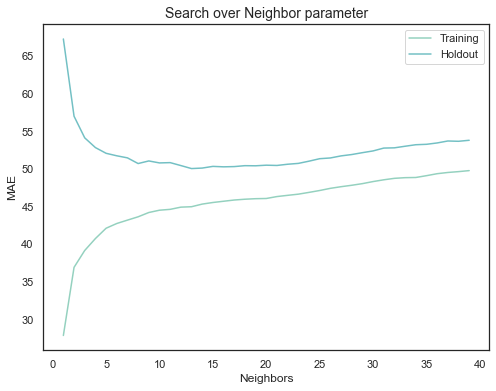

In [95]:
find_neighbors (X,Y)

In [96]:
from sklearn.neighbors import KNeighborsRegressor

#Fit model
KNN_reg   = KNeighborsRegressor(n_neighbors=12)
KNN_model = KNN_reg.fit(x_train20, y_train20) 

# Predict
y_hat_KNN = KNN_model.predict(x_test20)

print("MAE:",mean_absolute_error(y_hat_KNN, y_test20), "Bikes")
print("RMSE:",(mean_squared_error(y_hat_KNN, y_test20))**(0.5), "Bikes")  
print("R2:",r2_score(y_hat_KNN, y_test20))

MAE: 46.45479394449117 Bikes
RMSE: 80.63495791062866 Bikes
R2: 0.7659534594733324


## Predicting hourly demand with polynomial linear regression

In [97]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

def find_degree (x,y):
    
    # define list for collecting results
    err_train = [] 
    err_test  = []
    
    # split data
    # x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3,random_state=10)
    
    #loop over max_depth
    
    for n in np.arange(1,13): # lets test until 24 for now
        
        # fit model
        
        poly_reg = PolynomialFeatures(degree=n)
        X_poly   = poly_reg.fit_transform(x_train20)
        lin_reg2 = LinearRegression()
        lin_reg2.fit(X_poly,y_train20)
        
        # compute errors
        
        err_train.append(mean_absolute_error(y_train20, lin_reg2.predict(poly_reg.fit_transform(x_train20))))
        err_test.append(mean_absolute_error(y_hold20, lin_reg2.predict(poly_reg.fit_transform(x_hold20))))


    plt.figure(figsize = (8,6))
    plt.plot(np.arange(1,13), err_train,np.arange(1,13), err_test)
    plt.legend(["Training", "Holdout"])
    plt.xlabel("Max degree")
    plt.ylabel("MAE")
    plt.title("Search over max_degree",fontsize=14)
    #plt.ylim((0,1))
    plt.show()

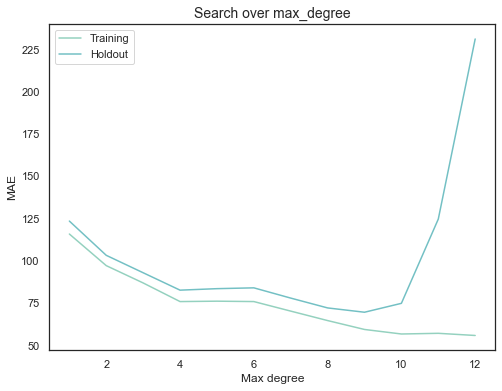

In [98]:
find_degree(X,Y)

In [99]:
poly_reg = PolynomialFeatures(degree=9)
X_poly   = poly_reg.fit_transform(x_train20)
lin_reg2 = LinearRegression()
lin_reg2.fit(X_poly,y_train20)
pred = lin_reg2.predict(poly_reg.fit_transform(x_test20))

print("MAE:",mean_absolute_error(pred, y_test20), "Bikes")
print("RMSE:",(mean_squared_error(pred, y_test20))**(0.5), "Bikes") 
print("R2:",r2_score(pred, y_test20))

MAE: 63.69255939865433 Bikes
RMSE: 110.1013585526069 Bikes
R2: 0.5812772868200142


## Predicting hourly demand with DecisionTreeRegressor

In [100]:
from sklearn.tree import DecisionTreeRegressor
# Do a 70-30 split first
x_train2, x_test2, y_train2, y_test2 = train_test_split(X, Y, test_size=0.3,random_state=34 )

# now split X_train to achive 50-20-30 split
x_train2, x_hold2, y_train2, y_hold2 = train_test_split(x_train2, y_train2, test_size=(0.2/0.7),random_state=34 )

def find_tree_depth (x,y):
    
    # define list for collecting results
    err_train = [] 
    err_test  = []
    
    # split data
    # x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3,random_state=10)
    
    #loop over max_depth
    
    for n in np.arange(1,21): # lets test until 24 for now
        
        # fit model
        
        tree_reg = DecisionTreeRegressor(max_depth=n)
        tree_model = tree_reg.fit(x_train2,y_train2)
        
        # compute errors
        
        err_train.append(mean_absolute_error(y_train2, tree_model.predict(x_train2)))
        err_test.append(mean_absolute_error(y_hold2, tree_model.predict(x_hold2)))


    plt.figure(figsize = (8,6))
    plt.plot(np.arange(1,21), err_train,np.arange(1,21), err_test)
    plt.legend(["Training", "Holdout"])
    plt.xlabel("Max Tree Depth")
    plt.ylabel("MAE")
    plt.title("Search over max_depth parameter",fontsize=14)
    #plt.ylim((0,1))
    plt.show()

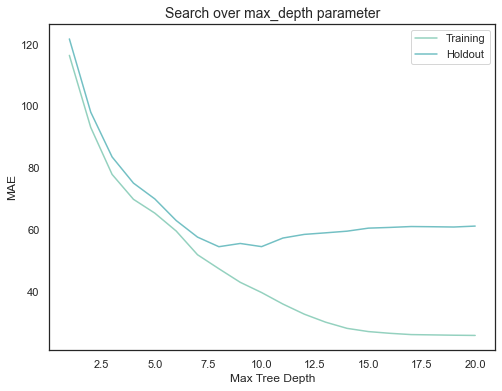

In [101]:
find_tree_depth (X,Y)

In [102]:
# Fit regression model
Tree_reg   = DecisionTreeRegressor(max_depth=9)
tree_model = Tree_reg.fit(x_train2, y_train2) 

# Predict
y_hat_tree = tree_model.predict(x_test2)

print("MAE:",mean_absolute_error(y_hat_tree, y_test2), "Bikes")
print("RMSE:",(mean_squared_error(y_hat_tree, y_test2))**(0.5), "Bikes")  
print("R2:",r2_score(y_hat_tree, y_test2))

MAE: 49.94618555439307 Bikes
RMSE: 87.80958984966962 Bikes
R2: 0.739094037883264


#### Interpreation of the achieved error

MAE: Mean absolut error, which describes the average fluctuation per prediction for a single value (hour) and the true realizations. For example if we predict 400 rentals for the next hour the true realization lays probably between 350 and 450.

RMSE: Root Mean Square error, which is similar to the MAE but not as commonly used as the MAE.

R2: Value that descirbes how much of the variance is described through the model.